## GNNs

In this notebook I will do some basic operations using the networkx library. 

It will take some cells before doing some real graph neural networking using the the torch_geometric library. 

I will use a standard GCNConv layer, a custom layer to imitate a GCNConv and a layer that subclasses the conv.MessagePassing class.

In [ ]:
#https://medium.com/@prathameshsonawane/graph-machine-learning-intro-4e35098f5176
#https://www.youtube.com/watch?v=VDzrvhgyxsU
%pip install networkx
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### An undirected, unweighted graph with a self edge

Creating a simple graph using the networkx library. All connections are represented using the adjacency matrix (node to node).
The incidence matrix (node to edge) isn't correct, Node 2 is connected to 2 edges, while node 1 and 3 are connected to only one edge. Where is the self edge? Just to show one needs to take care when using networkx library.

G weighted graph: False
G is directed: False
Graph to numpy
[[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]]
Adjacency matrix
[[0 1 0]
 [1 0 1]
 [0 1 1]]
Incidence matrix
<Compressed Sparse Column sparse array of dtype 'float64'
	with 4 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	1.0
  (1, 0)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
[[1. 0. 0.]
 [1. 1. 0.]
 [0. 1. 0.]]


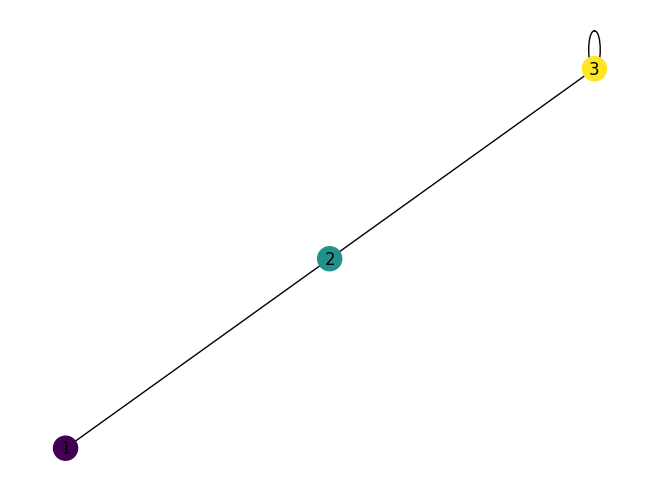

In [3]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(3,2)
G.add_edge(3,3)
nx.draw(G,cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True)
print(f"G weighted graph: {nx.is_weighted(G)}")
print(f"G is directed: {nx.is_directed(G)}")
G_np=nx.to_numpy_array(G)
print("Graph to numpy")
print(G_np)
print("Adjacency matrix")
A= nx.adjacency_matrix(G)
print(A.todense())
print("Incidence matrix")
i=nx.incidence_matrix(G)
print(i)
print(i.todense())

### A graph with weighted edges

As all the edges in the graph are weighted, this graph is a weighted graph. As the graph is defined using the nx.Graph() it is undirected. The self edges are neglected in the incidence matrix. In the adjacency matrix the weights are there to represent the connections between the nodes.

G weighted graph True
G is directed False
G to numpy graph
[[0. 2. 0.]
 [2. 4. 0.]
 [0. 0. 5.]]
Adjacency matrix
[[0 2 0]
 [2 4 0]
 [0 0 5]]
Incidence matrix
<Compressed Sparse Column sparse array of dtype 'float64'
	with 2 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	1.0
  (1, 0)	1.0
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]


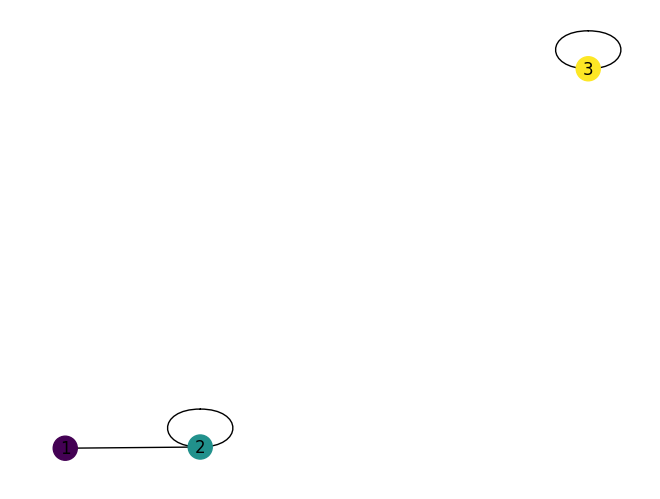

In [4]:
G = nx.Graph()
G.add_edge(1,2, weight=2)
G.add_edge(2,2, weight=4)
G.add_edge(3,3, weight=5)
nx.draw(G,cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True)
print(f"G weighted graph {nx.is_weighted(G)}")
print(f"G is directed {nx.is_directed(G)}")
print("G to numpy graph")
G_np=nx.to_numpy_array(G)
print(G_np)
print("Adjacency matrix")
A= nx.adjacency_matrix(G)
print(A.todense())
print("Incidence matrix")
i=nx.incidence_matrix(G)
print(i)
print(i.todense())

### A directed and weighted graph, with self edges.



G weighted graph True
G is directed True
G to numpy graph
[[0. 2. 0. 0.]
 [0. 4. 0. 0.]
 [0. 0. 5. 7.]
 [0. 0. 0. 0.]]
Adjacency matrix
[[0 2 0 0]
 [0 4 0 0]
 [0 0 5 7]
 [0 0 0 0]]
Incidence matrix
<Compressed Sparse Column sparse array of dtype 'float64'
	with 4 stored elements and shape (4, 4)>
  Coords	Values
  (0, 0)	1.0
  (1, 0)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


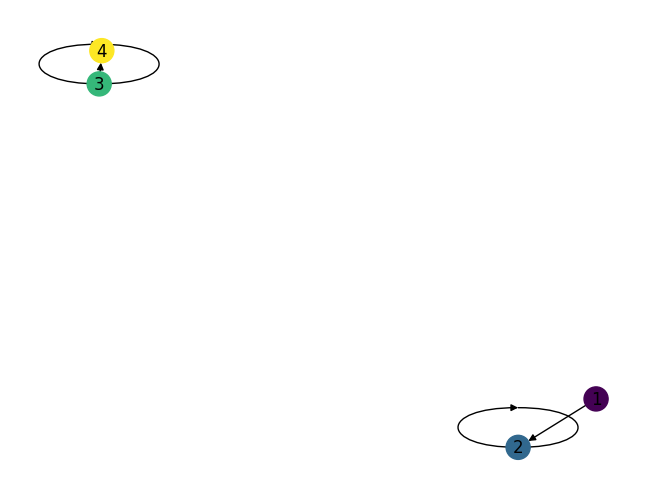

In [5]:
G = nx.DiGraph()
G.add_edge(1,2, weight=2)
G.add_edge(2,2, weight=4)
G.add_edge(3,3, weight=5)
G.add_edge(3,4, weight=7)
nx.draw(G,cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True)
print(f"G weighted graph {nx.is_weighted(G)}")
print(f"G is directed {nx.is_directed(G)}")
print("G to numpy graph")
G_np=nx.to_numpy_array(G)
print(G_np)
print("Adjacency matrix")
A= nx.adjacency_matrix(G)
print(A.todense())
print("Incidence matrix")
i=nx.incidence_matrix(G)
print(i)
print(i.todense())

G weighted graph True
G is directed True
[[0. 2. 5.]
 [0. 0. 4.]
 [0. 0. 0.]]
ajacency matrix
[[0 2 5]
 [0 0 4]
 [0 0 0]]
[0 0 0]
incidence matrix
<Compressed Sparse Column sparse array of dtype 'float64'
	with 6 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	1.0
  (1, 0)	1.0
  (0, 1)	1.0
  (2, 1)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
[[1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]]
laplacian matrix
<Compressed Sparse Row sparse array of dtype 'int64'
	with 5 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	7
  (0, 1)	-2
  (0, 2)	-5
  (1, 1)	4
  (1, 2)	-4
[[ 7 -2 -5]
 [ 0  4 -4]
 [ 0  0  0]]


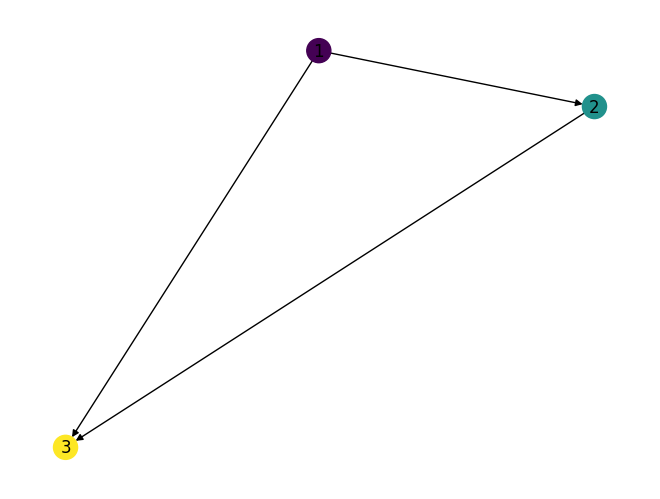

In [35]:
G = nx.DiGraph()
G.add_edge(1,2, weight=2)
G.add_edge(2,3, weight=4)
G.add_edge(1,3, weight=5)
nx.draw(G,cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True)
print(f"G weighted graph {nx.is_weighted(G)}")
print(f"G is directed {nx.is_directed(G)}")
G_np=nx.to_numpy_array(G)
print(G_np)
print("ajacency matrix")
A= nx.adjacency_matrix(G)
print(A.todense())
print(A.diagonal())
print("incidence matrix")
i=nx.incidence_matrix(G)
print(i)
print(i.todense())
print("laplacian matrix")
L=nx.laplacian_matrix(G)
print(L)
print(L.todense())

G weighted graph True
G is directed False
[[0. 2. 5.]
 [2. 0. 4.]
 [5. 4. 0.]]
ajacency matrix
[[0 2 5]
 [2 0 4]
 [5 4 0]]
[0 0 0]
incidence matrix
<Compressed Sparse Column sparse array of dtype 'float64'
	with 6 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	1.0
  (1, 0)	1.0
  (0, 1)	1.0
  (2, 1)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
[[1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]]
laplacian matrix
<Compressed Sparse Row sparse array of dtype 'int64'
	with 9 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	7
  (0, 1)	-2
  (0, 2)	-5
  (1, 0)	-2
  (1, 1)	6
  (1, 2)	-4
  (2, 0)	-5
  (2, 1)	-4
  (2, 2)	9
[[ 7 -2 -5]
 [-2  6 -4]
 [-5 -4  9]]


<function networkx.classes.function.degree(G, nbunch=None, weight=None)>

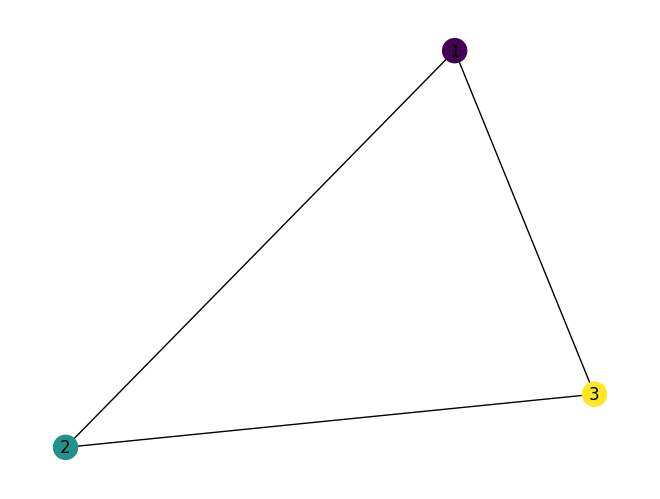

In [458]:
G = nx.Graph()
G.add_edge(1,2, weight=2)
G.add_edge(2,3, weight=4)
G.add_edge(1,3, weight=5)
nx.draw(G,cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True)
print(f"G weighted graph {nx.is_weighted(G)}")
print(f"G is directed {nx.is_directed(G)}")
G_np=nx.to_numpy_array(G)
print(G_np)
print("ajacency matrix")
A= nx.adjacency_matrix(G)
print(A.todense())
print(A.diagonal())
print("incidence matrix")
i=nx.incidence_matrix(G)
print(i)
print(i.todense())
print("laplacian matrix")
L=nx.laplacian_matrix(G)
print(L)
print(L.todense())
nx.degree

### Creating a Laplacian from the degree

In this case I am creating a Laplacian for the graph that is supposed to have weights. But I am only counting the number of edges out of a node. The Laplacian is a matrix considering the degree of a matrix and the adjacency matrix.

In [461]:
print(G.degree)
D = np.diag(G.degree)
degrees = [G.degree[node] for node in G.nodes]
print(degrees)
D = np.diag(degrees)
print("Degrees as diagonal")
print(D)
A=nx.adjacency_matrix(G)
print("Adjacency matrix")
print(A)
L=D-A
print("Laplacian")
print(L)


[(1, 2), (2, 2), (3, 2)]
[2, 2, 2]
Degrees as diagonal
[[2 0 0]
 [0 2 0]
 [0 0 2]]
Adjacency matrix
<Compressed Sparse Row sparse array of dtype 'int64'
	with 6 stored elements and shape (3, 3)>
  Coords	Values
  (0, 1)	2
  (0, 2)	5
  (1, 0)	2
  (1, 2)	4
  (2, 0)	5
  (2, 1)	4
Laplacian
[[ 2 -2 -5]
 [-2  2 -4]
 [-5 -4  2]]


### A graph with valued nodes

Showing a graph containing valued nodes. Calculating the clustering coefficient using the formula

$$ C_i=\frac{2*numOfEdgesOfNeighborsOfi}{degreeOfNodei*(degreeOfNodei-1)}

When assessing graphs and nodes, things like clustering indices, shortest paths, cycles are things to consider.

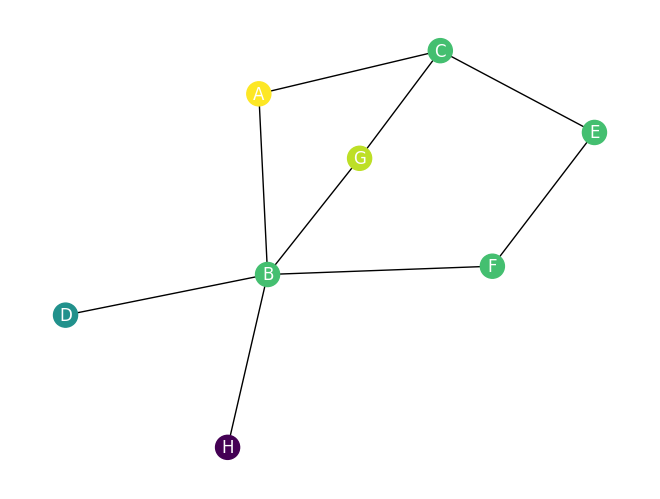

neighborhood ['A', 'D', 'H', 'G', 'F']
The clustering coefficient of node 'B' is:
0
As the neighbors of 'B' have no edges, its clustering index is 0


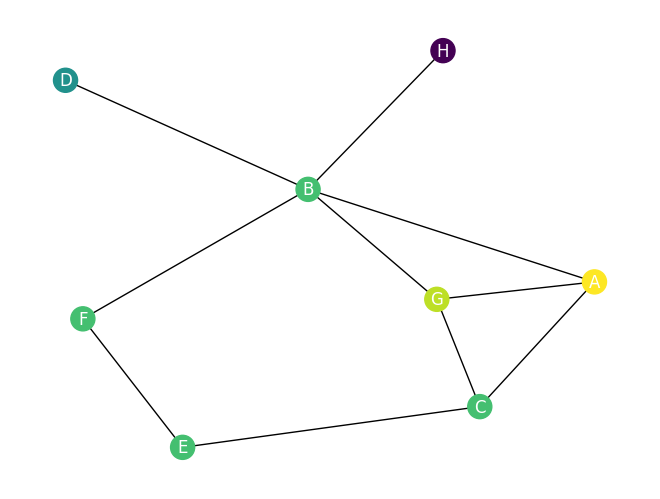

After adding an edge between 'A' and 'G', two neighbors of 'B'. Its clustering index becomes:
0.1
Or two times 1 divided by the product of the degree (number of neighbors) and the degree minus 1 being 5 times 4.
The clustering index of the whole graph
{'A': 0.6666666666666666, 'B': 0.1, 'C': 0.3333333333333333, 'D': 0, 'E': 0, 'F': 0, 'H': 0, 'G': 0.6666666666666666}
[['A', 'B', 'G'], ['A', 'B', 'G', 'C'], ['A', 'B', 'F', 'E', 'C'], ['A', 'B', 'F', 'E', 'C', 'G'], ['A', 'C', 'E', 'F', 'B', 'G'], ['A', 'C', 'G'], ['B', 'G', 'C', 'E', 'F']]
['H', 'B', 'F', 'E']
3


In [ ]:
G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5,
           'F': 0.7,
           'G': 0.9,
           'H': 0.0}

values = [val_map.get(node, .7) for node in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
plt.show()

node="B"
neighborhood = list(nx.neighbors(G, node))
print(f"neighborhood {neighborhood}")
print("The clustering coefficient of node 'B' is:")
print(nx.clustering(G,"B"))
print("As the neighbors of 'B' have no edges, its clustering index is 0")

G.add_edge('A','G')
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
plt.show()
print("After adding an edge between 'A' and 'G', two neighbors of 'B'. Its clustering index becomes:")
print(nx.clustering(G,"B"))
print("Or two times 1 divided by the product of the degree (number of neighbors) and the degree minus 1 being 5 times 4.")
print("The clustering index of the whole graph")
print(nx.clustering(G))
print("Find cycles in the graph")
cycles = nx.simple_cycles(G)
print(list(cycles))
print("Find shortest path, and its length")
sp_length = nx.shortest_path_length(G,"H", "E")
sp = nx.shortest_path(G,"H", "E")
print(sp)
print(sp_length)

### Graph containing edge labels

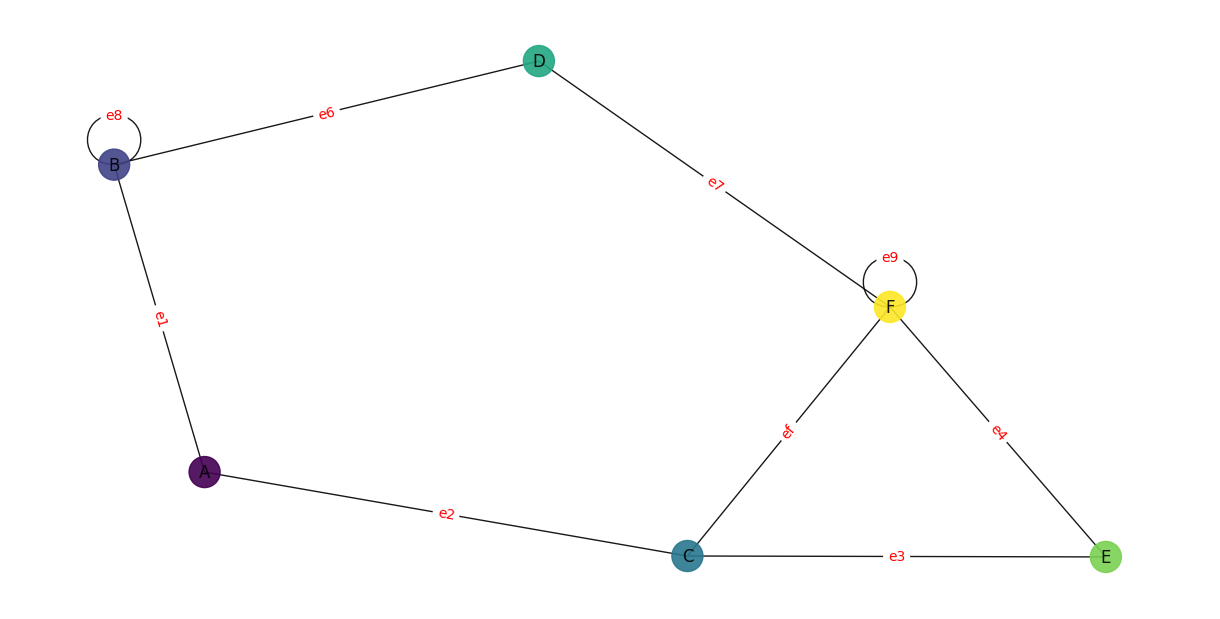

False
False


In [32]:

edge_labels={('A', 'B'): 'e1',  ('A', 'C'): 'e2', ('C', 'E'): 'e3', ('E', 'F'): 'e4', ('C', 'F'): 'ef', ('B', 'D'): 'e6', ('D', 'F'): 'e7'
  , ('B', 'B'): 'e8', ('F', 'F'): 'e9'}
all_edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'E'), ('C', 'F'),
     ('E', 'F'), ('D', 'F'),
     ('B', 'B'), ('F', 'F')]

G = nx.Graph() 
G.add_edges_from(all_edges)
    

val_map = {'A': 1.0,
           'B': 2.0,
           'C': 3.0,
           'D': 4.0, 'E': 5.0, 'F': 6.0}
values = [val_map.get(node, 0.25) for node in G.nodes()]

pos = nx.spring_layout(G)
plt.figure(figsize=(12,6))
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color=values, alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='red'
)
plt.axis('off')
plt.show()
print(nx.is_weighted(G))
print(nx.is_directed(G))

### Random walks

To generate 'sentences' from a graph, to generate an embedding for the nodes of a graph, one needs random walks.

In [33]:
import random
def get_randomwalk(graph_val, node, path_length):
    random_walk = [node]
    
    for i in range(path_length-1):
        temp = list(graph_val.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk


In [37]:
from tqdm import tqdm
# get list of all nodes from the graph
all_nodes = list(G.nodes())

random_walks = []
for n in tqdm(all_nodes):
    for i in range(1,10):
        random_walks.append(get_randomwalk(G, n, i))
        
# count of sequences
print(f"number of random walks {len(random_walks)}")
print(random_walks)

100%|██████████| 6/6 [00:00<00:00, 5943.75it/s]

number of random walks 54
[['A'], ['A', 'B'], ['A', 'B', 'D'], ['A', 'B', 'D', 'F'], ['A', 'B', 'D', 'F', 'E'], ['A', 'C', 'F', 'D', 'B'], ['A', 'B', 'D', 'F', 'C', 'E'], ['A', 'B', 'D', 'F', 'C', 'E'], ['A', 'C', 'F', 'E'], ['B'], ['B', 'A'], ['B', 'D', 'F'], ['B', 'A', 'C', 'E'], ['B', 'A', 'C', 'E', 'F'], ['B', 'D', 'F', 'E', 'C', 'A'], ['B', 'A', 'C', 'E', 'F', 'D'], ['B', 'D', 'F', 'C', 'E'], ['B', 'D', 'F', 'E', 'C', 'A'], ['C'], ['C', 'F'], ['C', 'E', 'F'], ['C', 'F', 'D', 'B'], ['C', 'F', 'E'], ['C', 'E', 'F', 'D', 'B', 'A'], ['C', 'F', 'D', 'B', 'A'], ['C', 'F', 'D', 'B', 'A'], ['C', 'E', 'F', 'D', 'B', 'A'], ['D'], ['D', 'B'], ['D', 'F', 'C'], ['D', 'F', 'C', 'E'], ['D', 'B', 'A', 'C', 'E'], ['D', 'B', 'A', 'C', 'F', 'E'], ['D', 'B', 'A', 'C', 'F', 'E'], ['D', 'B', 'A', 'C', 'F', 'E'], ['D', 'F', 'E', 'C', 'A', 'B'], ['E'], ['E', 'F'], ['E', 'C', 'F'], ['E', 'F', 'C', 'A'], ['E', 'F', 'C', 'A', 'B'], ['E', 'F', 'D', 'B', 'A', 'C'], ['E', 'F', 'D', 'B', 'A', 'C'], ['E', 'F', '

### A simple GNNLayer

This layer will aggregate neighboring nodes' information. These kind of layers typically has access to the edge list (representing the complete graph) and x (representing all the nodes' features). The forward method adds self_loops to the edge list. To allow the node's proper feature vector to be kept in the equation. The linear layer transforms the features for every node. 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleGNNLayer(nn.Module):
    """
    A basic Graph Neural Network layer implementing message passing.
    Args:
        in_features (int): Size of each input node feature vector.
        out_features (int): Size of each output node feature vector.
    """
    def __init__(self, in_features, out_features):
        super(SimpleGNNLayer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        # Define the learnable weight matrix
        self.linear = nn.Linear(in_features, out_features, bias=False)
        # Initialize weights (optional but often good practice)
        #nn.init.xavier_uniform_(self.linear.weight)

    def forward(self, x, edge_index):
        """
        Defines the computation performed at every call.
        Args:
            x (torch.Tensor): Node features tensor with shape [num_nodes, in_features].
            edge_index (torch.Tensor): Graph connectivity in COO format with shape [2, num_edges].
                                       edge_index[0] = source nodes, edge_index[1] = target nodes.
        Returns:
            torch.Tensor: Updated node features tensor with shape [num_nodes, out_features].
        """
        num_nodes = x.size(0)

        # 1. Add self-loops to the adjacency matrix represented by edge_index
        # Create tensor of node indices [0, 1, ..., num_nodes-1]
        self_loops = torch.arange(0, num_nodes, device=x.device).unsqueeze(0)
        self_loops = self_loops.repeat(2, 1) # Shape [2, num_nodes]
        # Concatenate original edges with self-loops
        edge_index_with_self_loops = torch.cat([edge_index, self_loops], dim=1)

        # Extract source and target node indices
        row, col = edge_index_with_self_loops
        print("row col")
        print(row)
        print(row.shape)
        print(col)
        print(col.shape)

        # 2. Linearly transform node features
        x_transformed = self.linear(x) # Shape: [num_nodes, out_features]

        # 3. Aggregate features from neighbors (including self)
        # We want to sum features of source nodes (row) for each target node (col)
        # Initialize output tensor with zeros
        aggregated_features = torch.zeros(num_nodes, self.out_features, device=x.device)

        # Use index_add_ for efficient aggregation (scatter sum)
        # Adds elements from x_transformed[row] into aggregated_features at indices specified by col
        # index_add_(dimension, index_tensor, tensor_to_add)
        aggregated_features.index_add_(0, col, x_transformed[row])

        # 4. Apply final activation function (optional)
        # For this example, let's use ReLU
        output_features = F.relu(aggregated_features)

        return output_features

    def __repr__(self):
        return f'{self.__class__.__name__}({self.in_features}, {self.out_features})'

https://pytorch-geometric.readthedocs.io/en/2.6.1/notes/create_gnn.html

In [453]:
import torch
from torch.nn import Linear, Parameter
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree

class GCNConv_custom(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super().__init__(aggr='add')
        self.lin = Linear(in_channels, out_channels, bias=False)
        self.bias = Parameter(torch.empty(out_channels))

        self.reset_parameters()

    def reset_parameters(self):
        self.lin.reset_parameters()
        self.bias.data.zero_()

    def forward(self, x, edge_index):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]

        # Step 1: Add self-loops to the adjacency matrix.
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

        # Step 2: Linearly transform node feature matrix.
        x = self.lin(x)

        # Step 3: Compute normalization.
        row, col = edge_index
        deg = degree(col, x.size(0), dtype=x.dtype)
        deg_inv_sqrt = deg.pow(-0.5)
        deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0
        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]

        # Step 4-5: Start propagating messages.
        out = self.propagate(edge_index, x=x, norm=norm)

        # Step 6: Apply a final bias vector.
        out = out + self.bias

        return out

    def message(self, x_j, norm):
        # x_j has shape [E, out_channels]

        # Step 4: Normalize node features.
        return norm.view(-1, 1) * x_j

### From edge index lists to adjacency matrix

Sometimes it's interesting to convert the edge index lists to an adjacency matrix

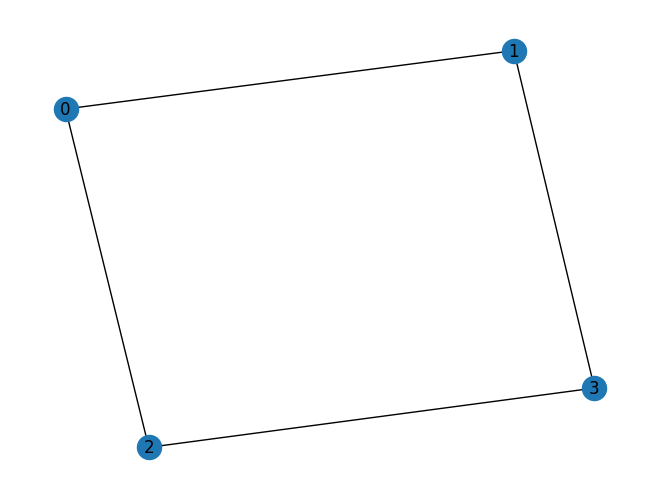

In [454]:
from torch import tensor
edge_index= tensor([[0, 0, 1, 2, 1, 2, 3, 3], [1, 2, 0, 0, 3, 3, 1, 2]])
ei=edge_index.T.numpy()

G = nx.from_edgelist(ei)
nx.draw(G, with_labels=True)
edge_index=edge_index.type(torch.LongTensor)

In [508]:
def edge_list_to_adjacency_matrix(edge_list, directed=False):
    nodes = set()
    for edge in edge_list:
        nodes.add(edge[0])
        nodes.add(edge[1])

    nodes = sorted(list(nodes))
    num_nodes = len(nodes)
    adjacency_matrix = [[0] * num_nodes for _ in range(num_nodes)]

    for edge in edge_list:
        index_1 = nodes.index(edge[0])
        index_2 = nodes.index(edge[1])
        adjacency_matrix[index_1][index_2] = 1
        if not directed:
            adjacency_matrix[index_2][index_1] = 1

    return adjacency_matrix

In [510]:
adj_mat=edge_list_to_adjacency_matrix(ei)
print(adj_mat)

[[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0]]


## Using a GNN (Graph Neural Network) to generate a node embedding

In this part I am going to introduce a GNN to create a node embedding. At first a basic dataset is going to be assessed using some simple operations. But first let's perform some installs and imports.

In [38]:
%pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.8.0+cpu.html
%pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-2.8.0+cpu.html
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [482]:
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import KarateClub

In [511]:
dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')
print(f'Number of Node Features: {dataset.num_node_features}')
print(f'Number of Edge Features: {dataset.num_edge_features}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4
Number of Node Features: 34
Number of Edge Features: 0


### Data

The data to be used in the network is on the first element of the data set.

So by setting the 'data=dataset[0] one can access this data.

This data contains elements like: 

-The edge_index property holds the information about the graph connectivity, i.e., a tuple of source and destination node indices for each edge.

-Node features as x (each of the 34 nodes is assigned a 34-dim feature vector)

-Node labels as y (each node is assigned to exactly one class).

-The train mask allows to select the nodes to use as training elements

I believe the dataset contains data concerning karate fights between people. Another node type are judges, I believe.


In [512]:
data = dataset[0]
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [513]:
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is Directed: {data.is_directed()}')
print(f'Is undirected: {data.is_undirected()}')
print(f'Edge weight: {data.edge_weight}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')

Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Has isolated nodes: False
Has self-loops: False
Is Directed: False
Is undirected: True
Edge weight: None
Number of training nodes: 4
Training node label rate: 0.12


### what the data looks like

In this part the data can be seen when looking thoroughly.

In [487]:
data.node_stores

[{'x': tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.

### Showing the edges as a tensor of size number of edges times 2

In [488]:
edge_index = data.edge_index
print(edge_index.t())
print(edge_index.t().shape)

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

### Graph classes
Every node has a class. So y is a tensor of size 34 times 1, containing values 0 to 3 in every place.

In [489]:
print(f'Number of classes: {dataset.num_classes}')
print(data.y)

Number of classes: 4
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


### Node features
Every node has an embedding of 34 elements.At this moment every node embedding is a unique element from the identity matrix. The embedding is represented by the data.x tensor.

In [490]:
print(data.num_node_features)
print(data.num_features)
print(data.num_nodes)
print(f"shape of node embedding {data.x.shape}")
print(f"Is data.x an identity matrix: {torch.equal(data.x, torch.eye(34))}")

34
34
34
shape of node embedding torch.Size([34, 34])
Is data.x an identity matrix: True


### Graph visualisation

The graph from the karateclub dataset visualized. As the data.y tensor contains the labels for the nodes the nodes can be typed.

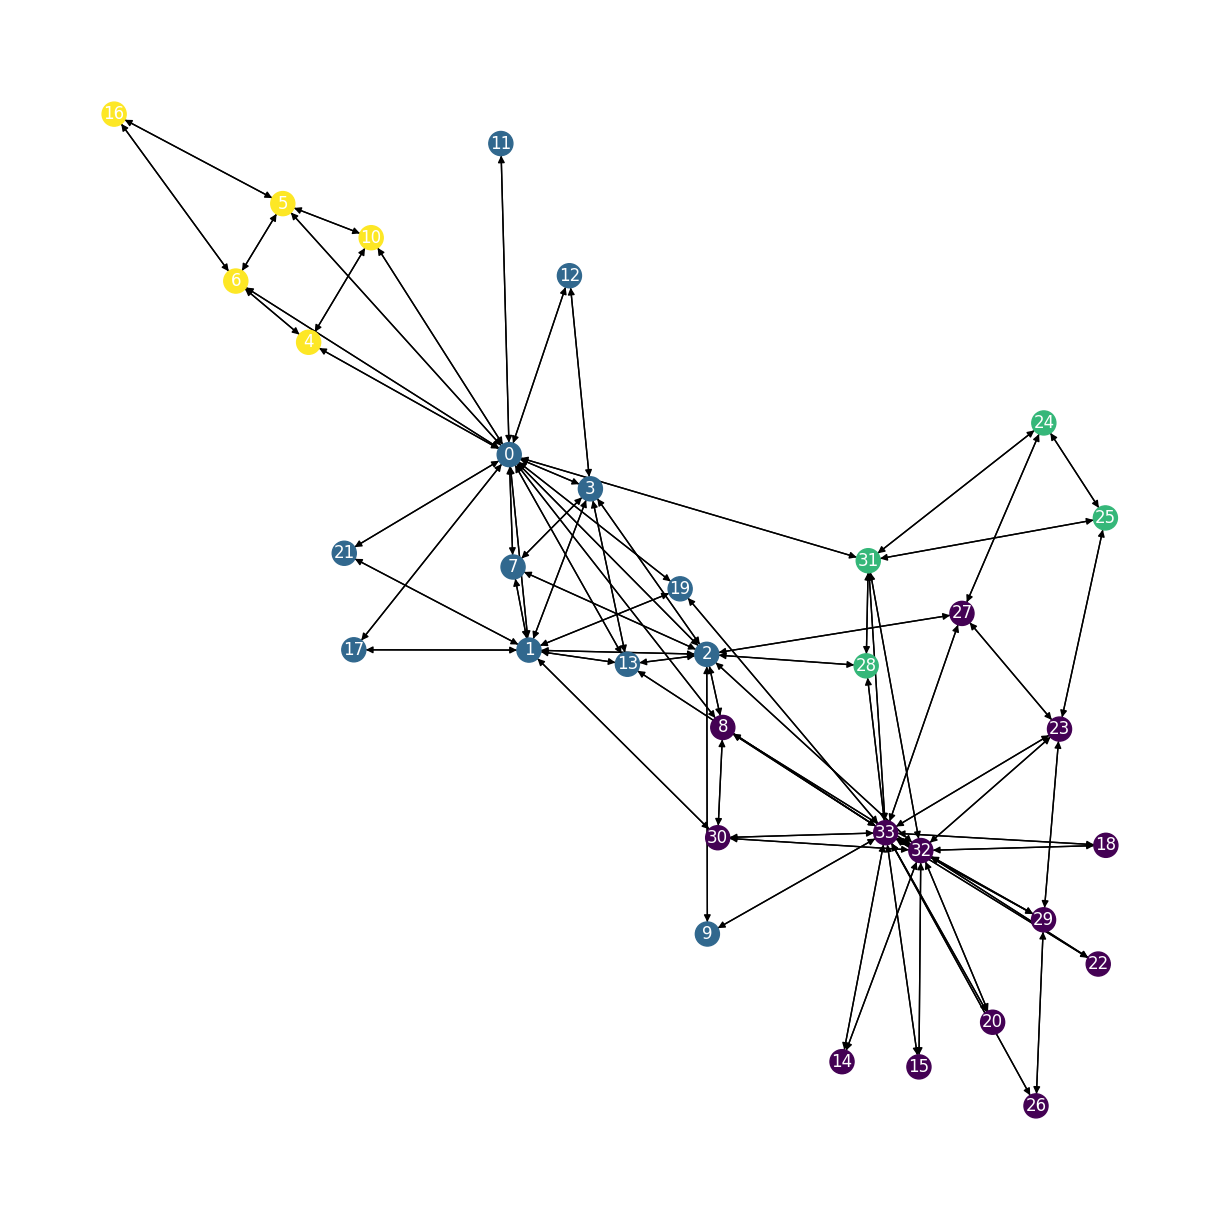

In [514]:
from torch_geometric.utils.convert import to_networkx
karate_directed_graph = to_networkx(data)
plt.figure(figsize=(12,12))
nx.draw(karate_directed_graph,  with_labels=True, node_color=data.y, font_color="white")

## GNN

### Objective

There are 30 nodes with unknown label. Only 4 nodes have a label. The 4 nodes all have a different label. The target of the 3 models is to generate embeddings for the nodes that have no embedding. 

In the image below is a comparison between the convolutional operators GCNConv and Conv2D.

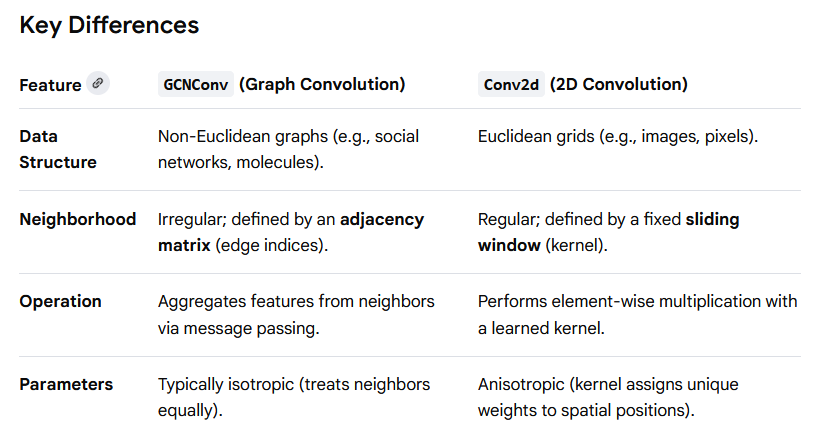


The 3 models will generate a 2-dimensional embedding per node. In each model I will respectively use the default GCNConv, a custom SimpleGNNLayer that receives updates from its neighbors and a custom GCNConv layer, a subclass from torch geometric MessagePassing.



In [515]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()
        out = self.classifier(h)

        return out, h

In [516]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN_custom(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = SimpleGNNLayer(dataset.num_features, 4)
        self.conv2 = SimpleGNNLayer(4, 4)
        self.conv3 = SimpleGNNLayer(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()
        out = self.classifier(h)

        return out, h

In [517]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN_custom1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv_custom(dataset.num_features, 4)
        self.conv2 = GCNConv_custom(4, 4)
        self.conv3 = GCNConv_custom(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()
        out = self.classifier(h)

        return out, h

### Showing the model's layers

In [518]:
model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


In [519]:
model_custom = GCN_custom()
print(model_custom)

GCN_custom(
  (conv1): SimpleGNNLayer(34, 4)
  (conv2): SimpleGNNLayer(4, 4)
  (conv3): SimpleGNNLayer(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


In [520]:
model_custom1 = GCN_custom1()
print(model_custom1)

GCN_custom1(
  (conv1): GCNConv_custom()
  (conv2): GCNConv_custom()
  (conv3): GCNConv_custom()
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


### Generate an untrained embedding

In [521]:
_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

Embedding shape: [34, 2]


In [522]:
_, h_custom = model_custom(data.x, data.edge_index)
print(f'Embedding shape: {list(h_custom.shape)}')

Embedding shape: [34, 2]


In [523]:
_, h_custom1 = model_custom1(data.x, data.edge_index)
print(f'Embedding shape: {list(h_custom1.shape)}')

Embedding shape: [34, 2]


In [524]:
def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(12,8))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    s=plt.scatter(h[:, 0], h[:, 1], c=data.y, s=140, cmap='jet')
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.legend(*s.legend_elements())
    plt.show()

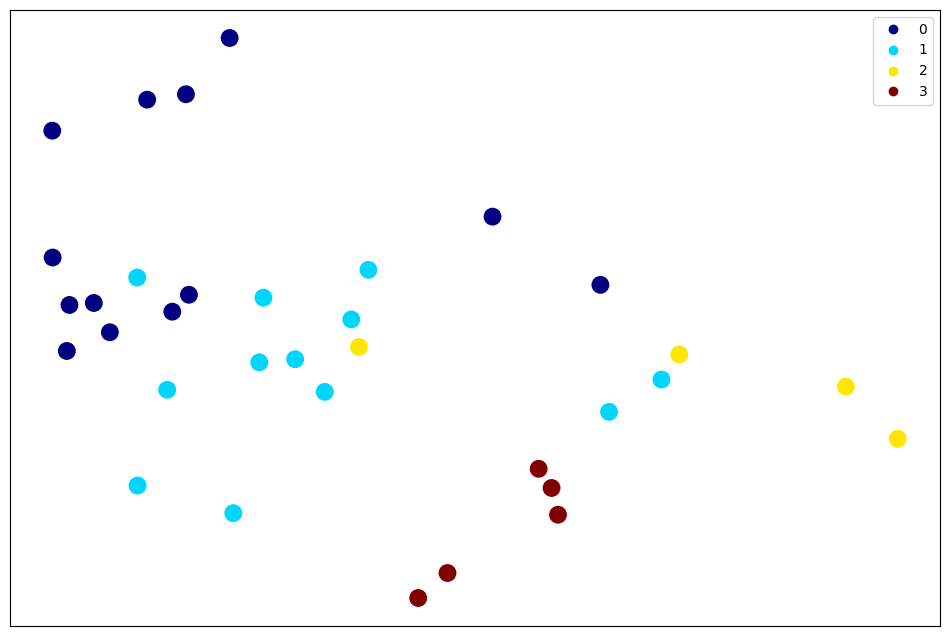

In [525]:
visualize_embedding(h, color=data.y)

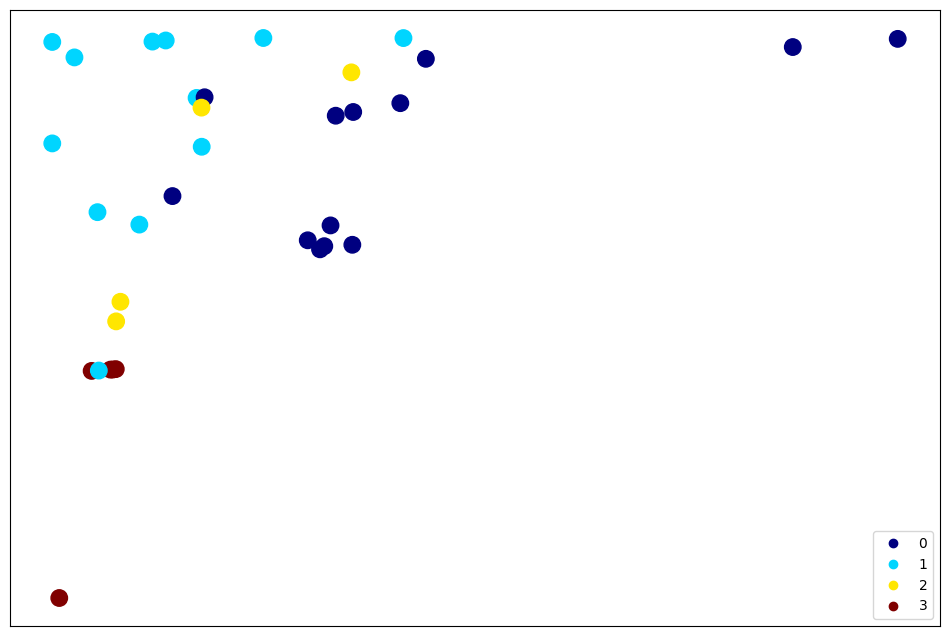

In [503]:
visualize_embedding(h_custom, color=data.y)

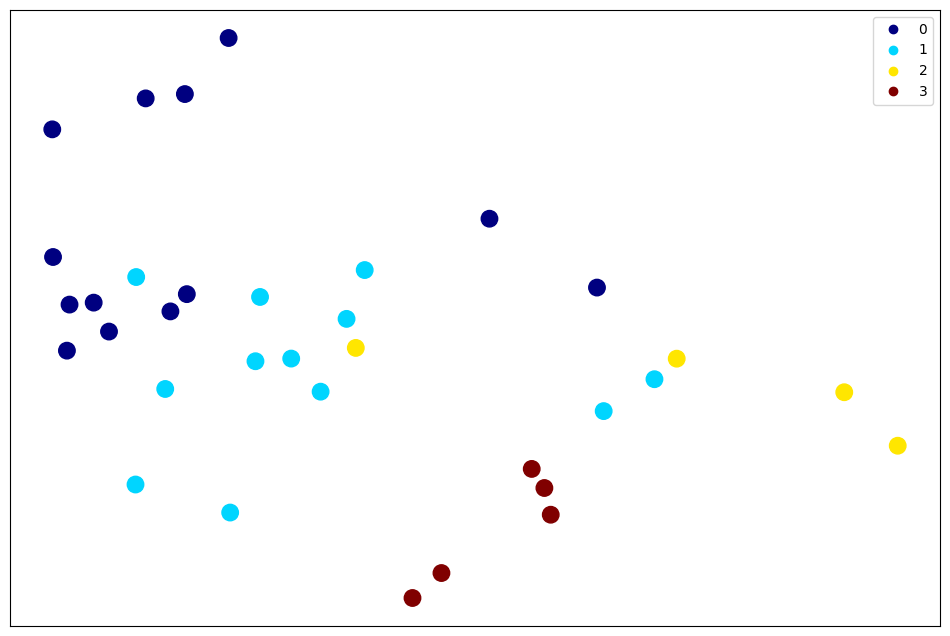

In [504]:
visualize_embedding(h_custom1, color=data.y)

### Training the network

Every epoch, the 2-dimensional embedding is being adapted.

In [505]:
def train(data, model, criterion, optimizer):
    model.train()
    optimizer.zero_grad()
    out, h = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss, h

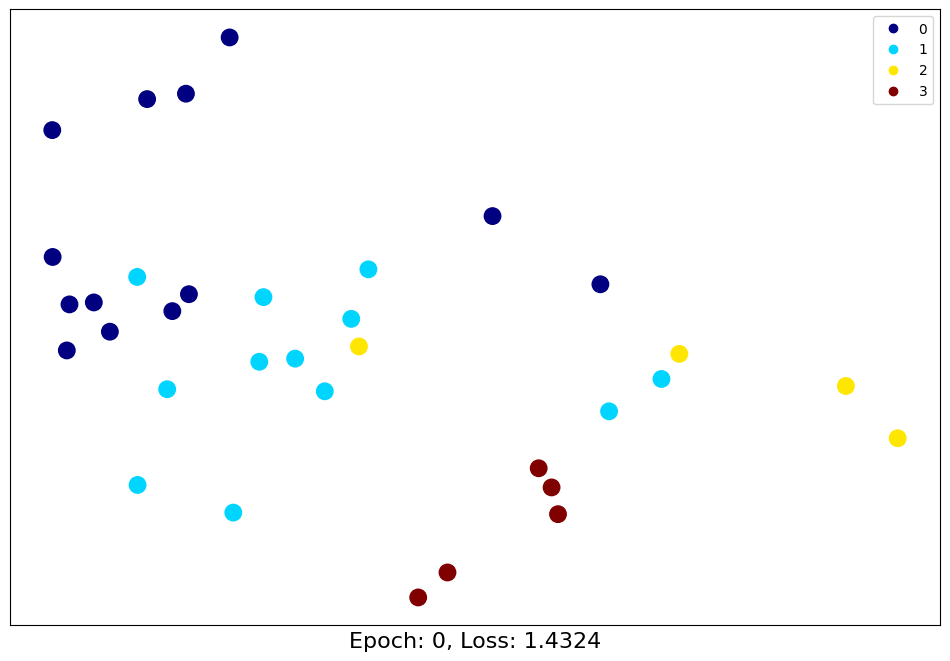

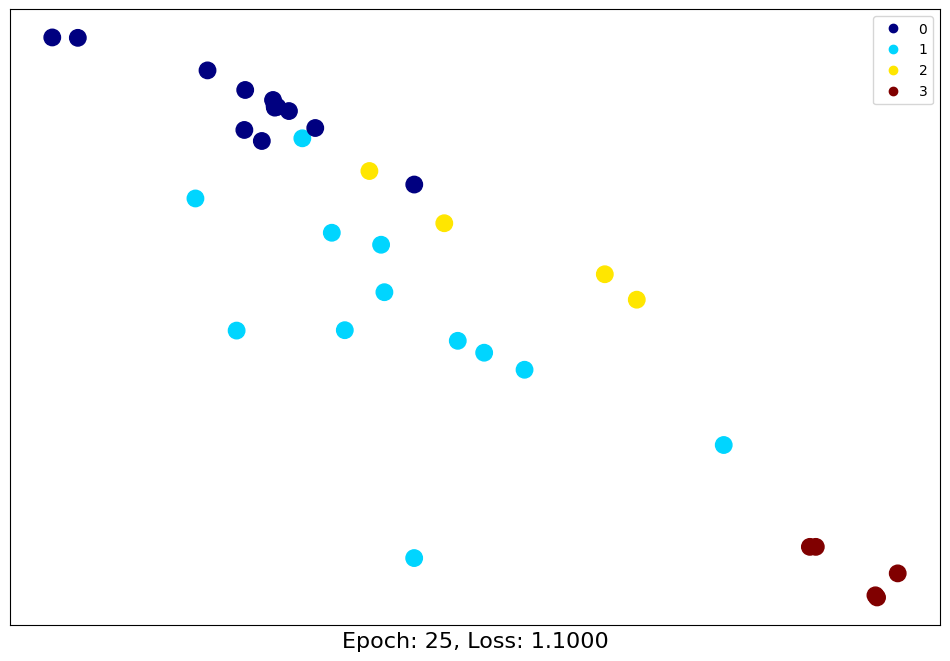

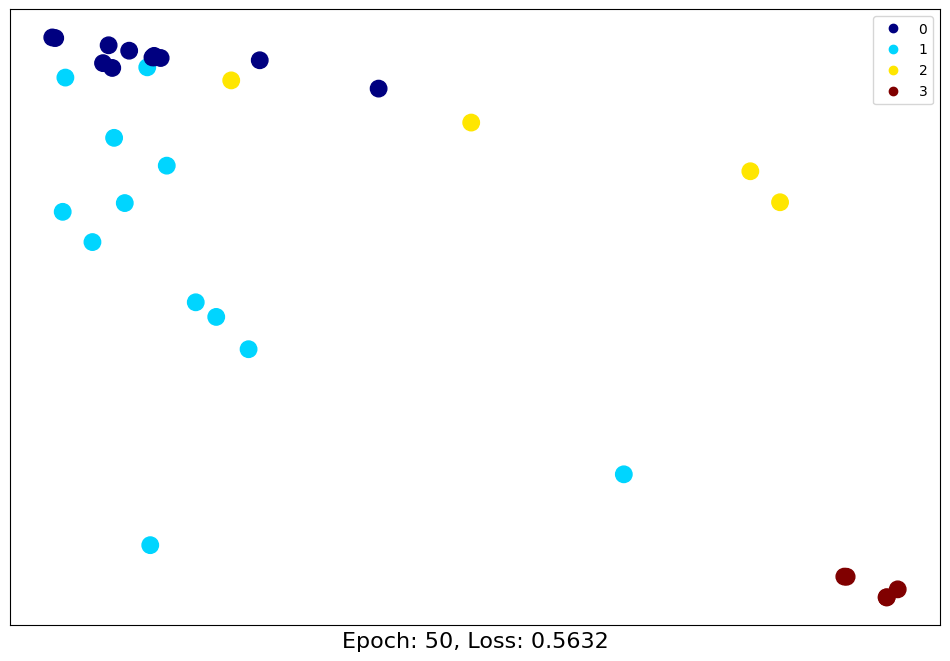

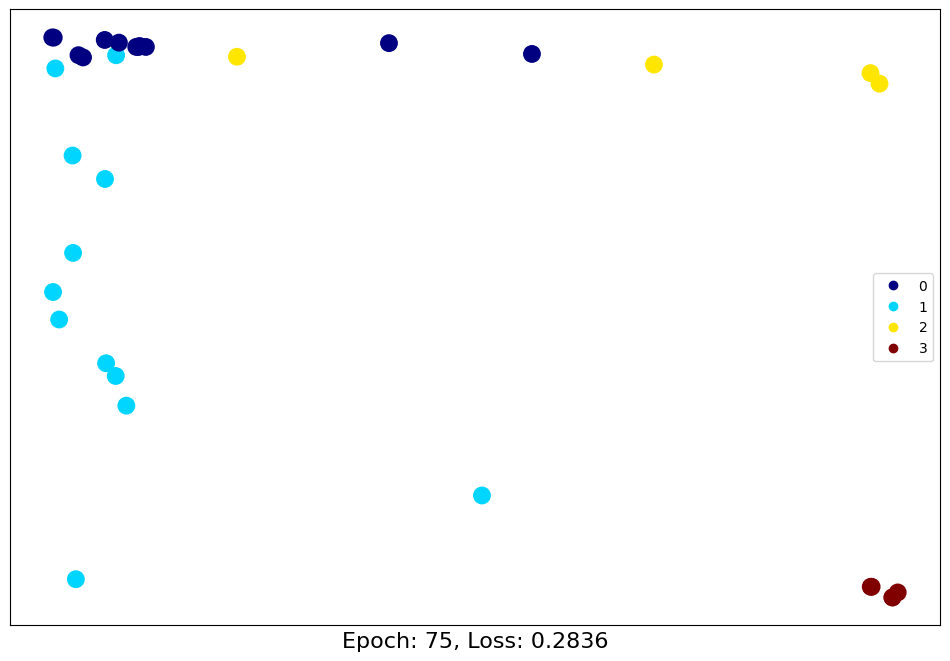

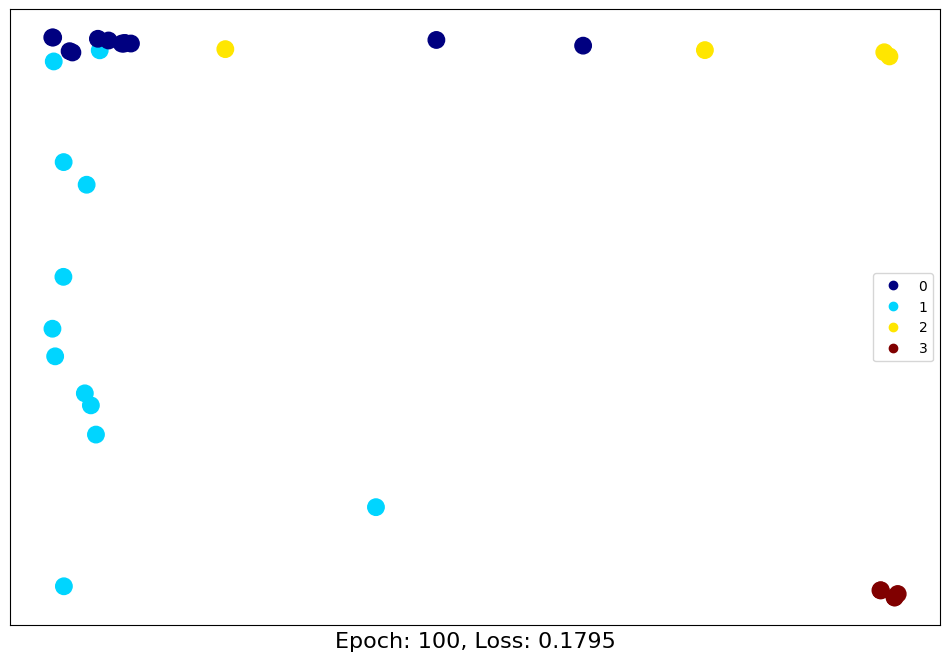

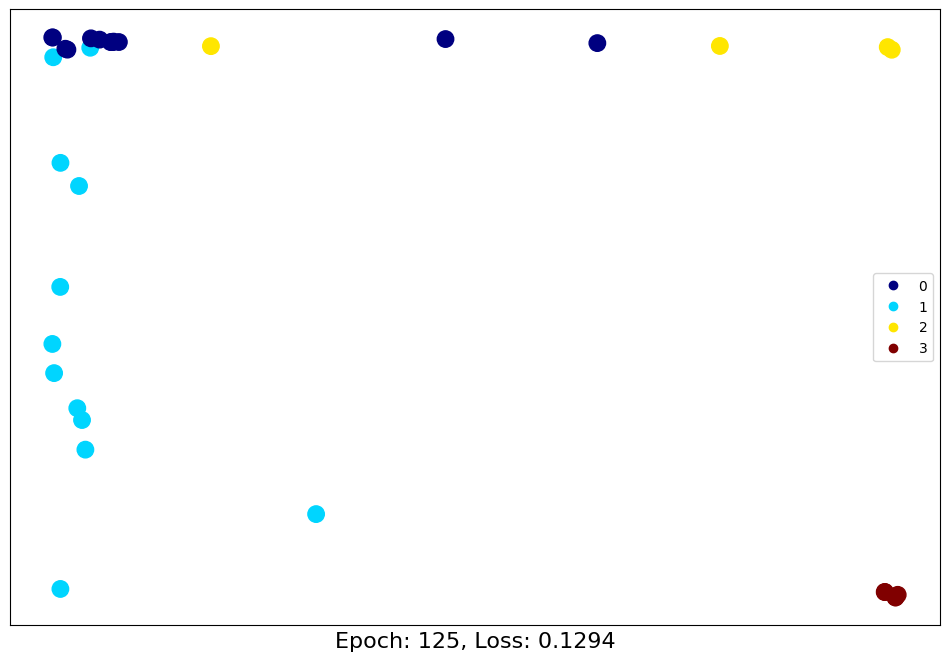

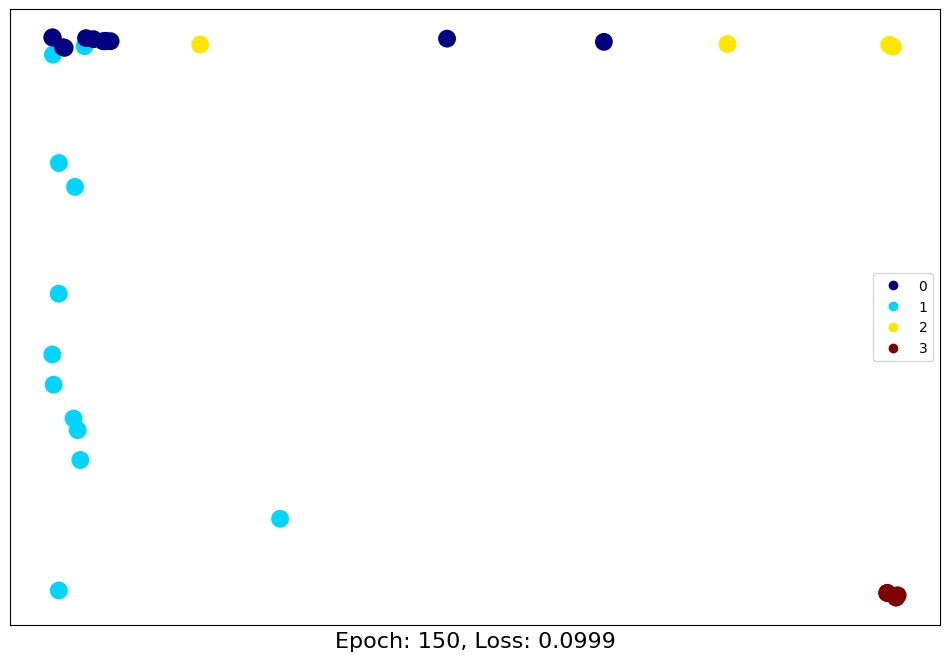

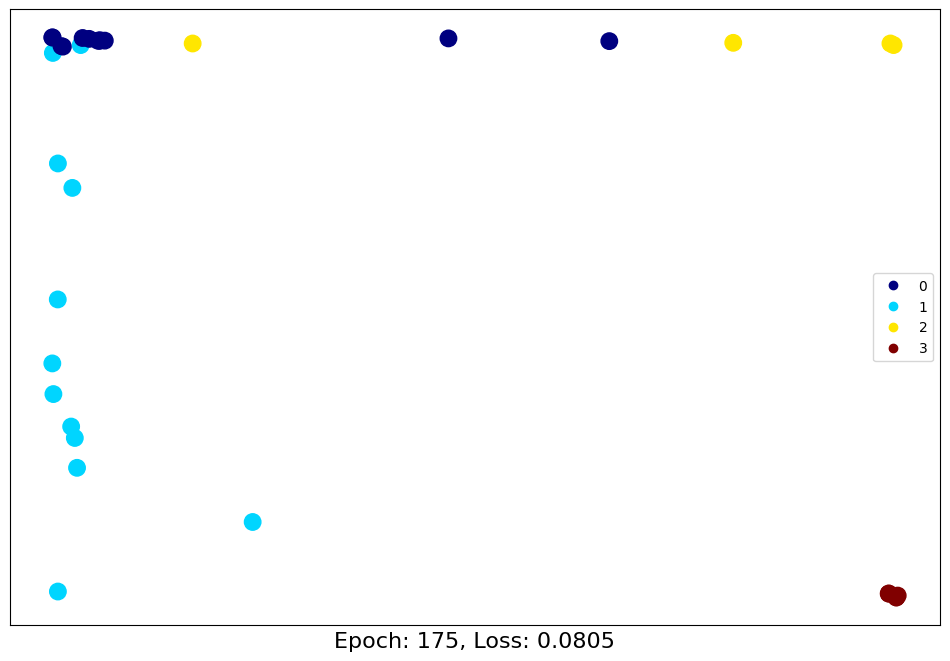

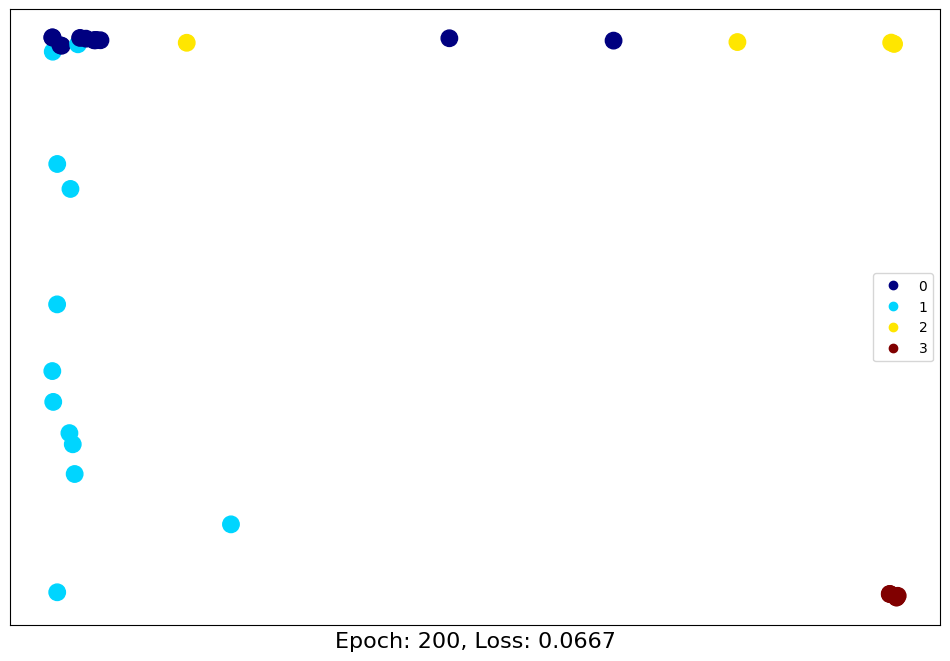

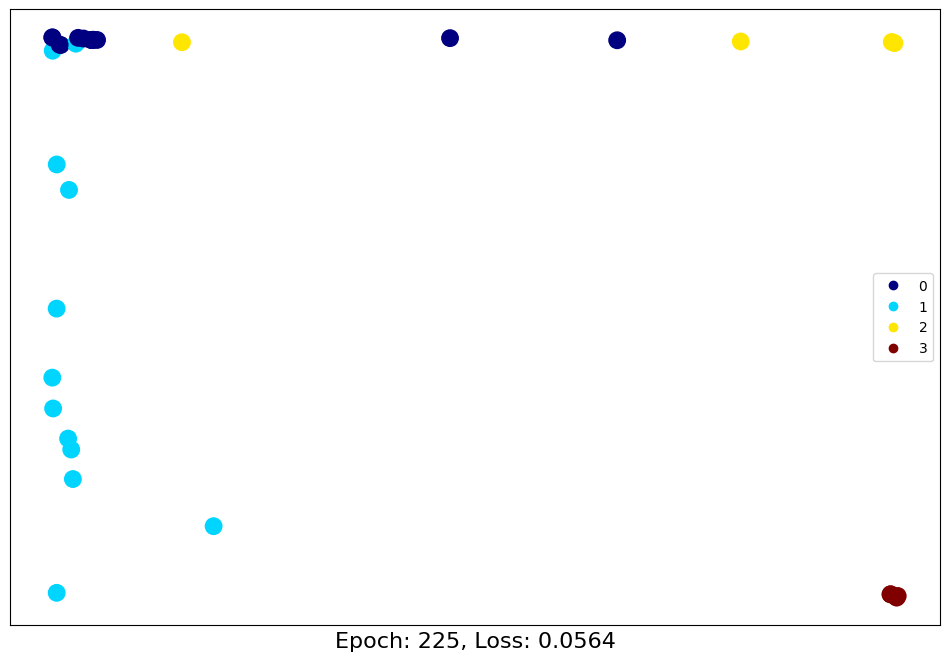

In [506]:
import time
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(250):
    loss, h = train(data, model, criterion, optimizer)
    if epoch % 25 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)
        final_h = h

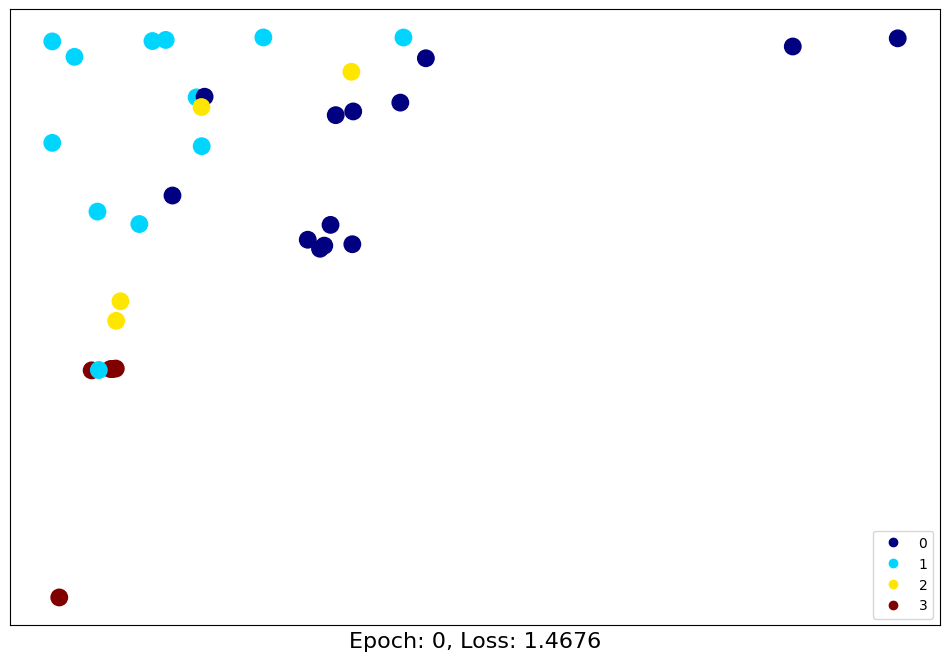

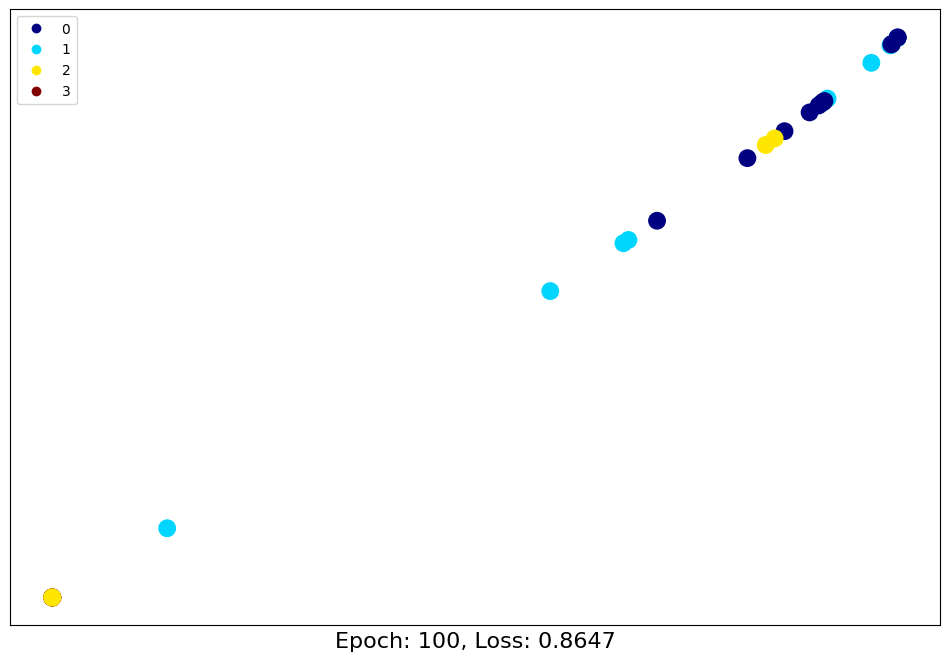

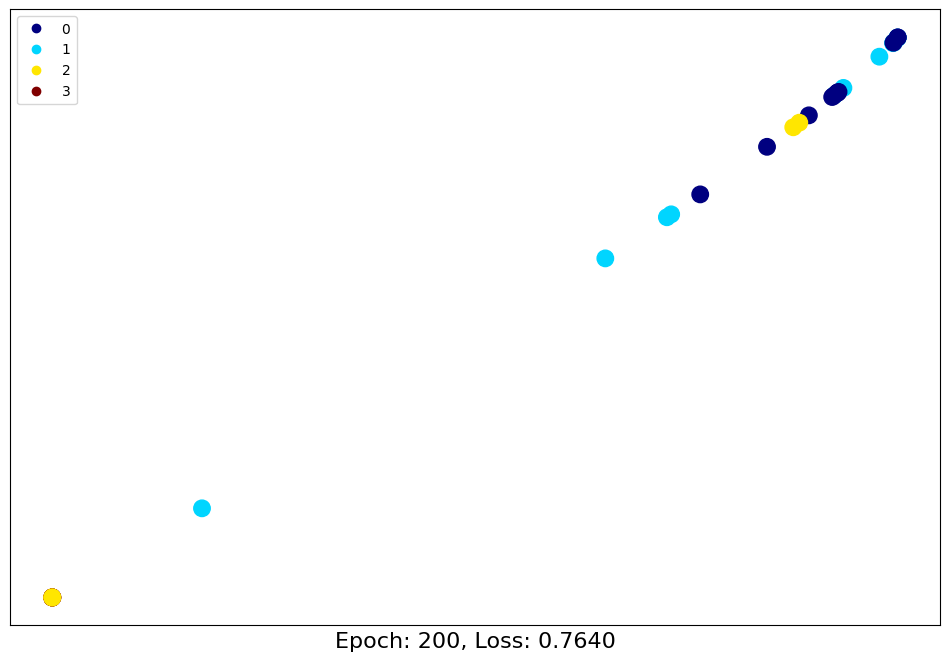

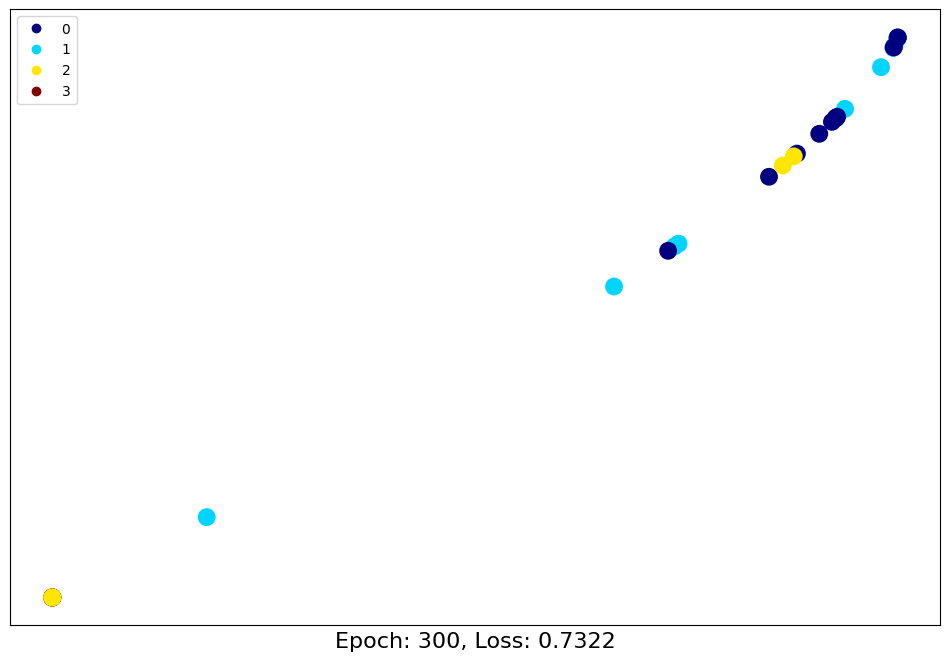

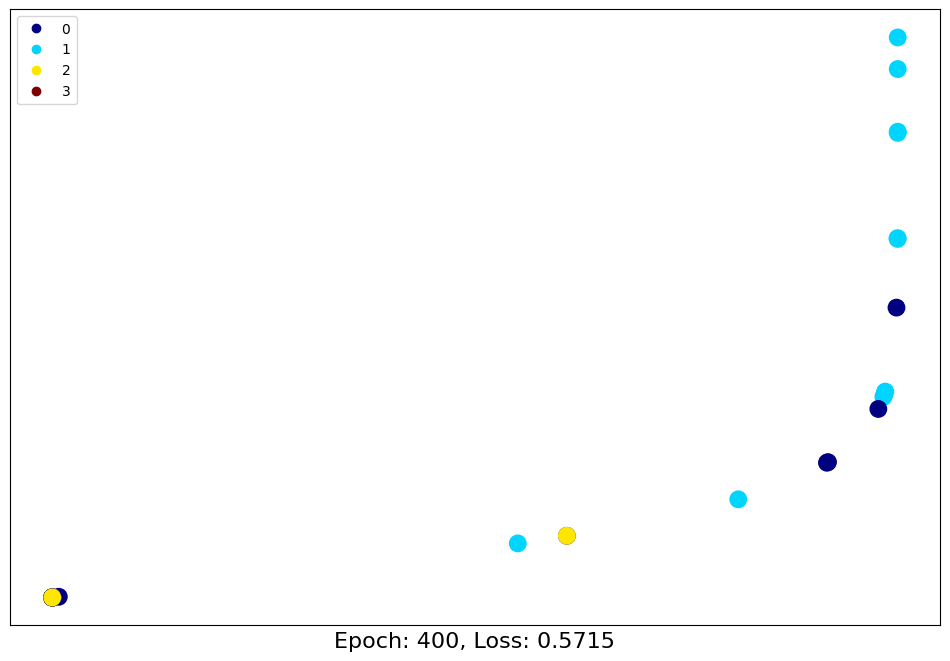

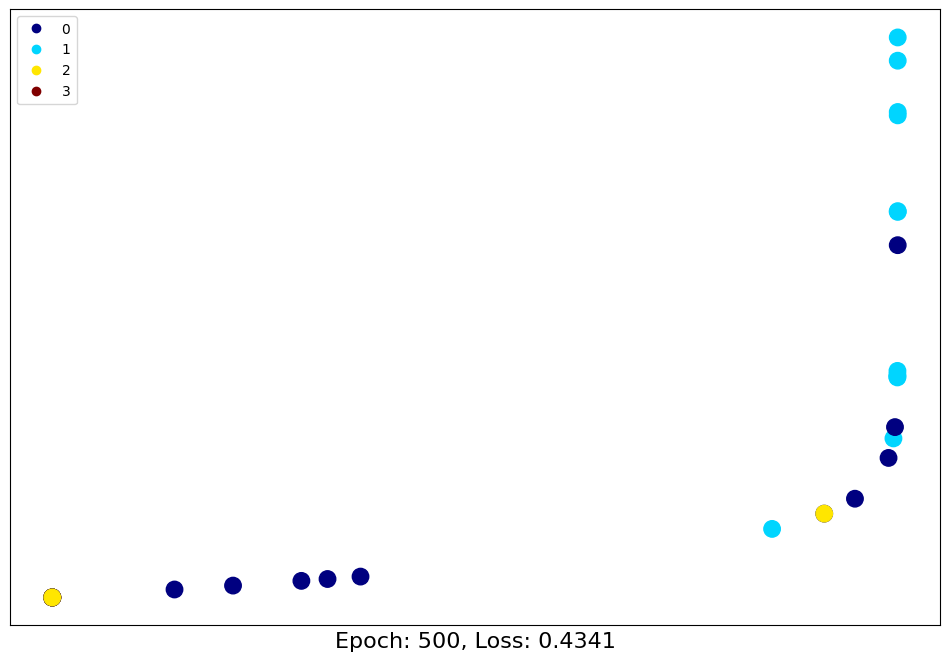

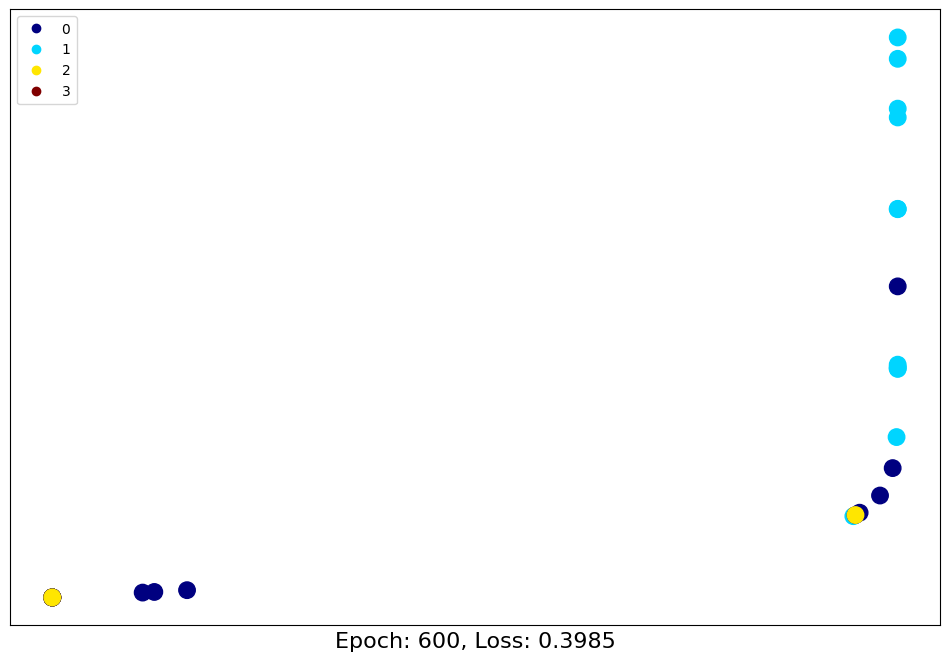

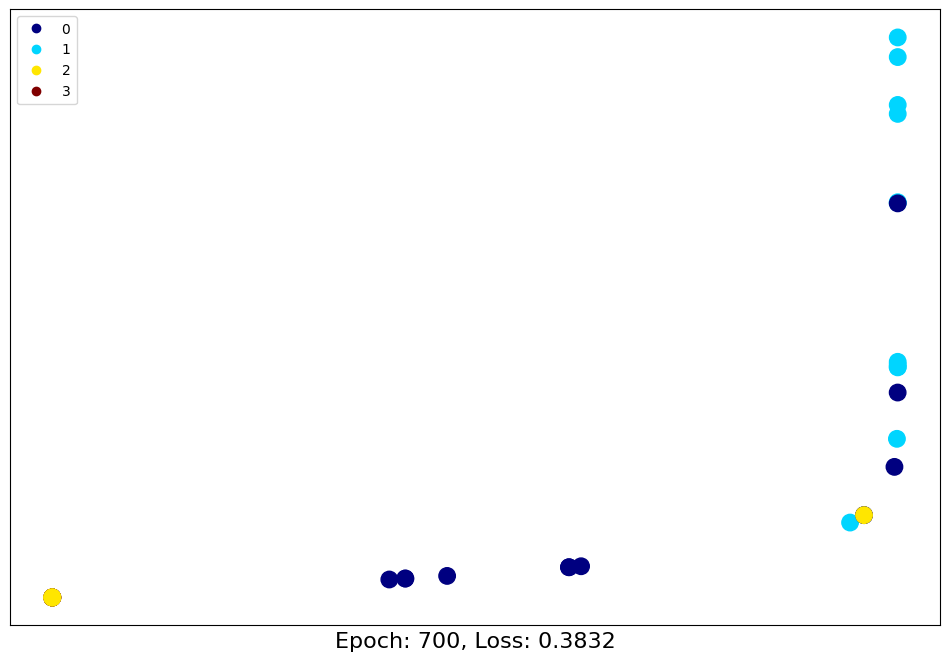

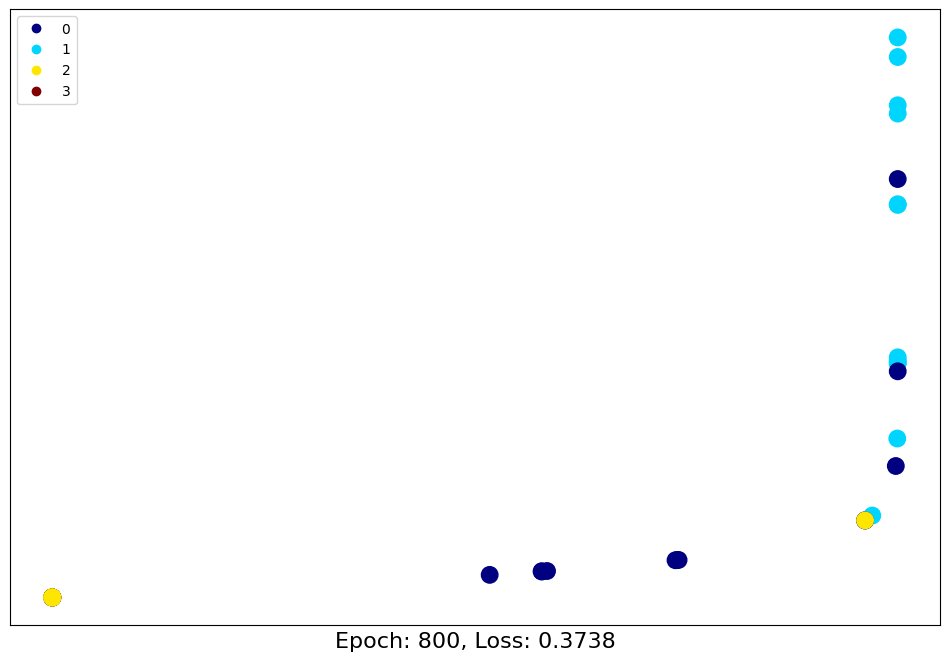

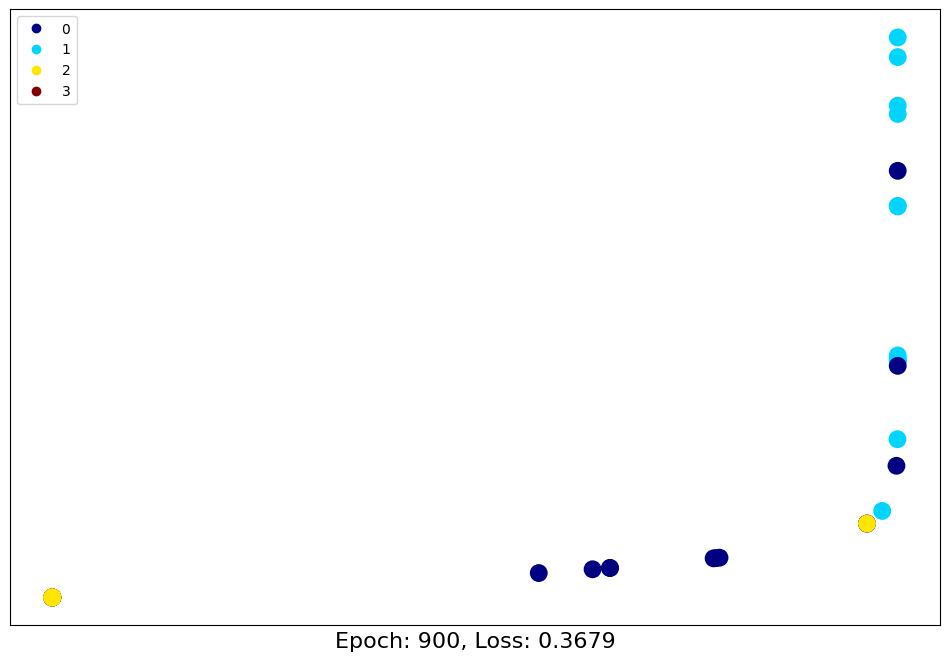

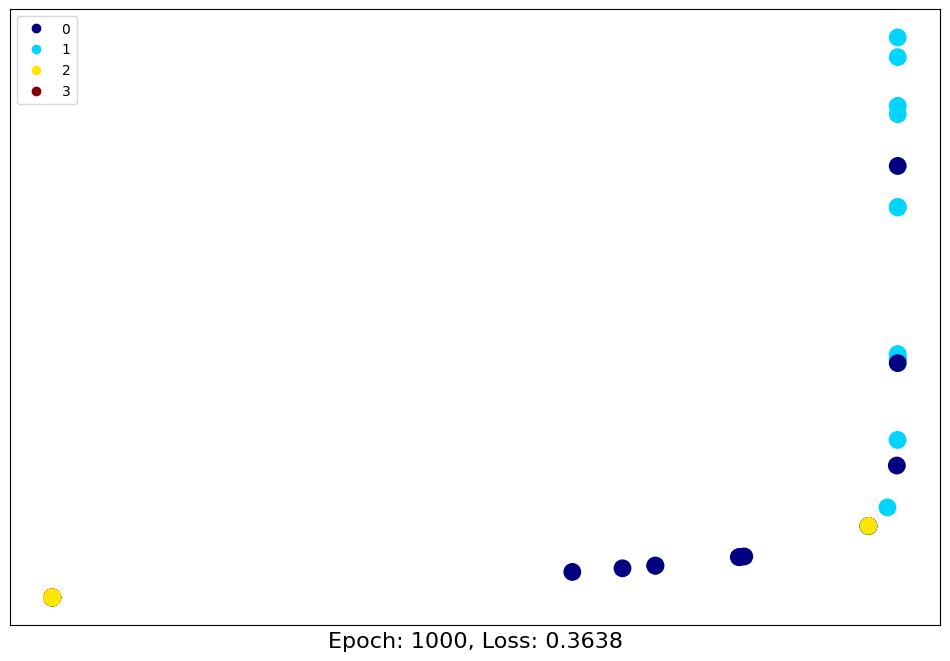

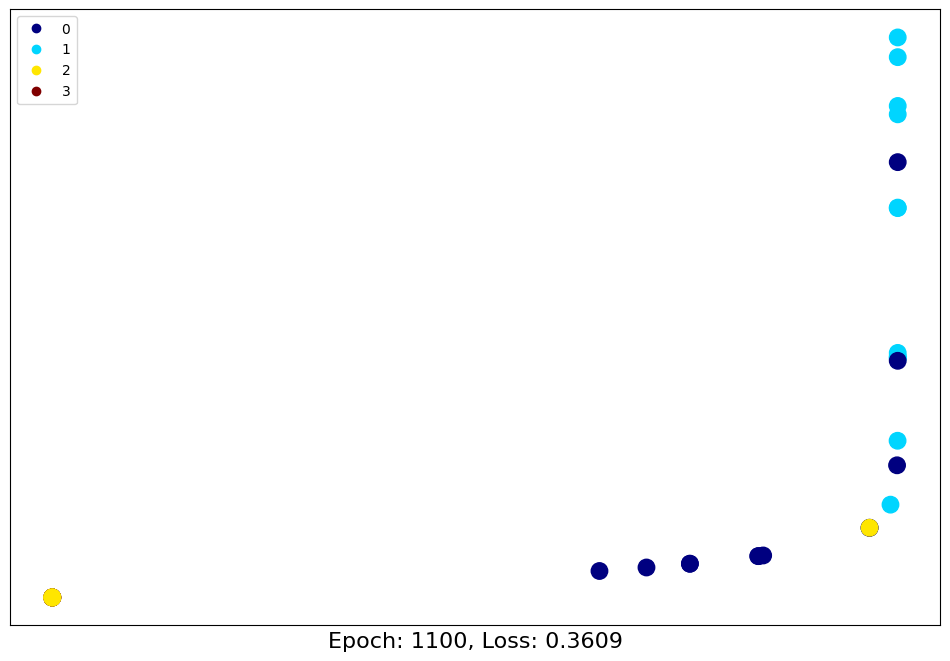

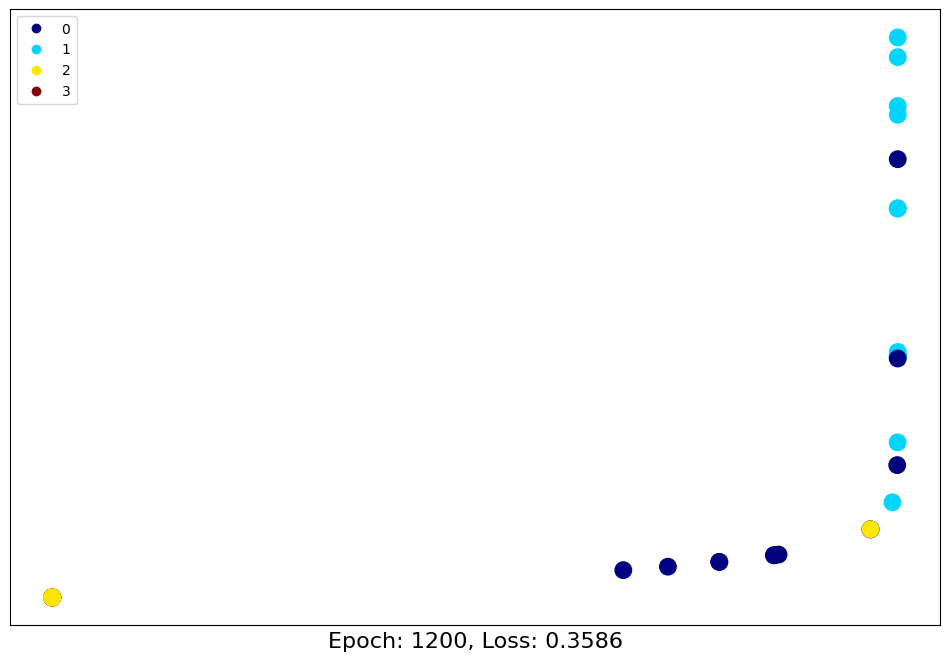

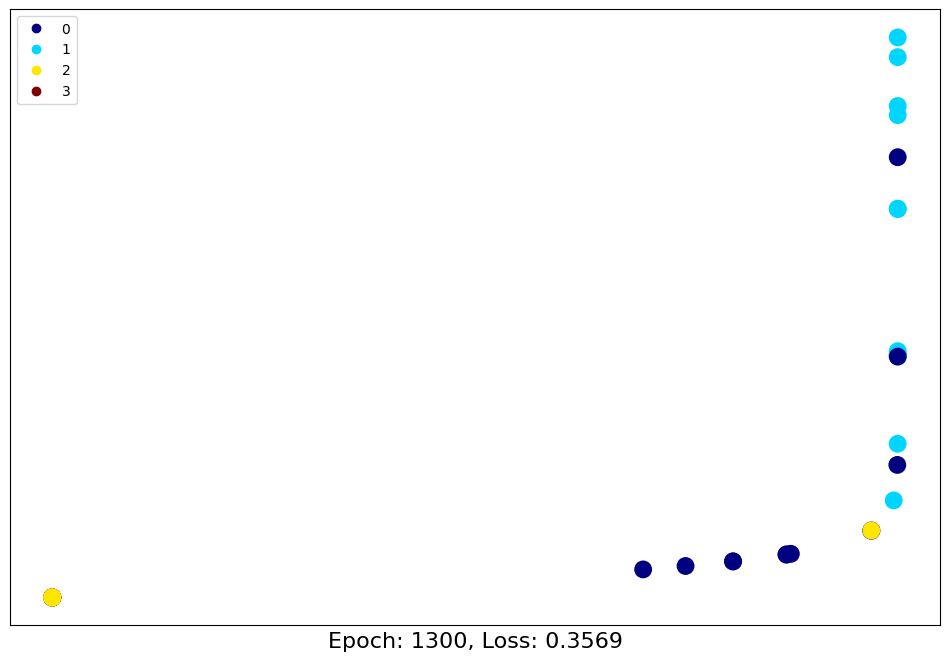

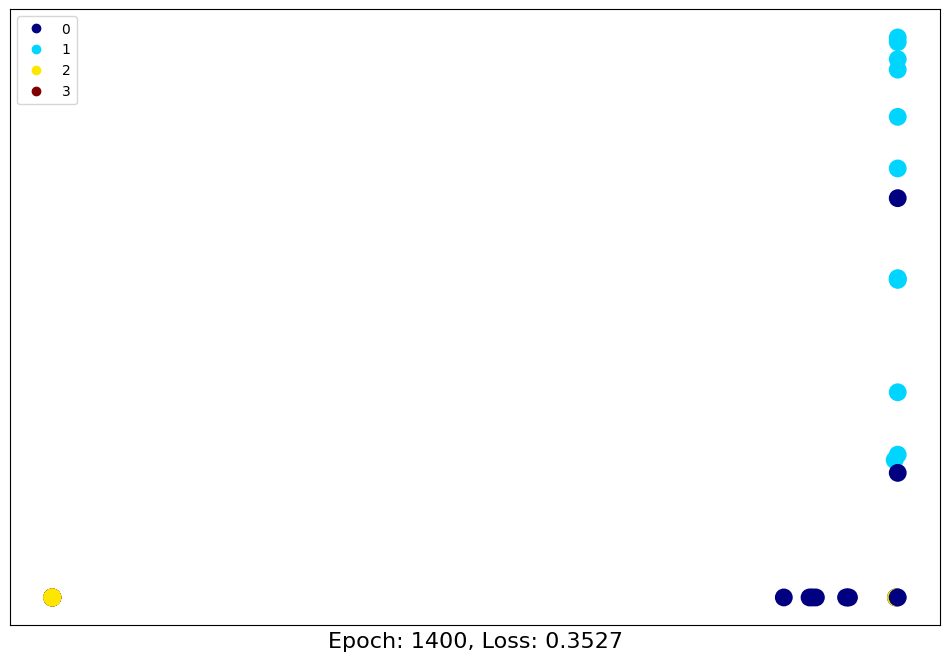

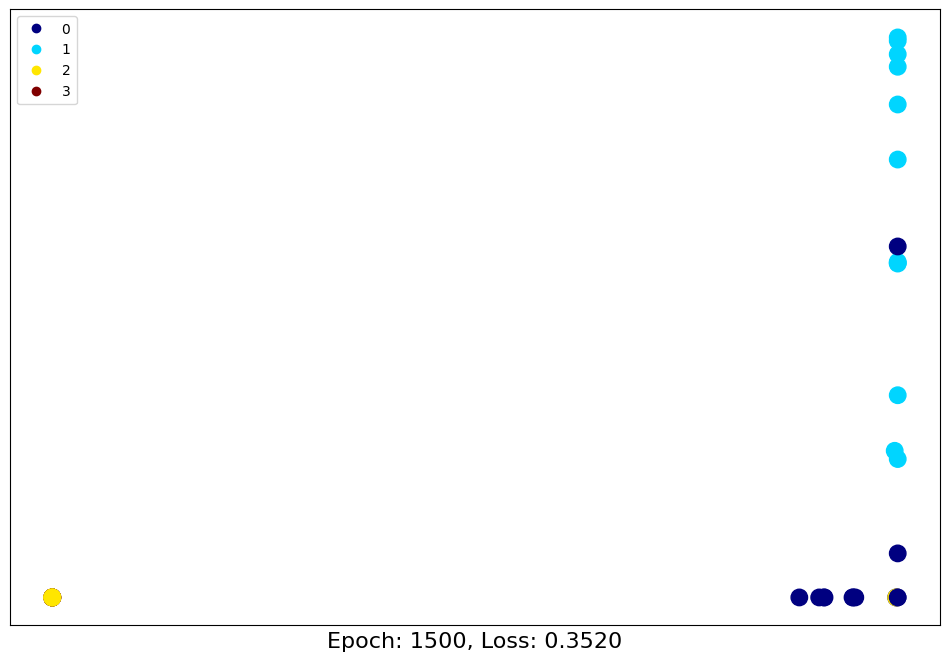

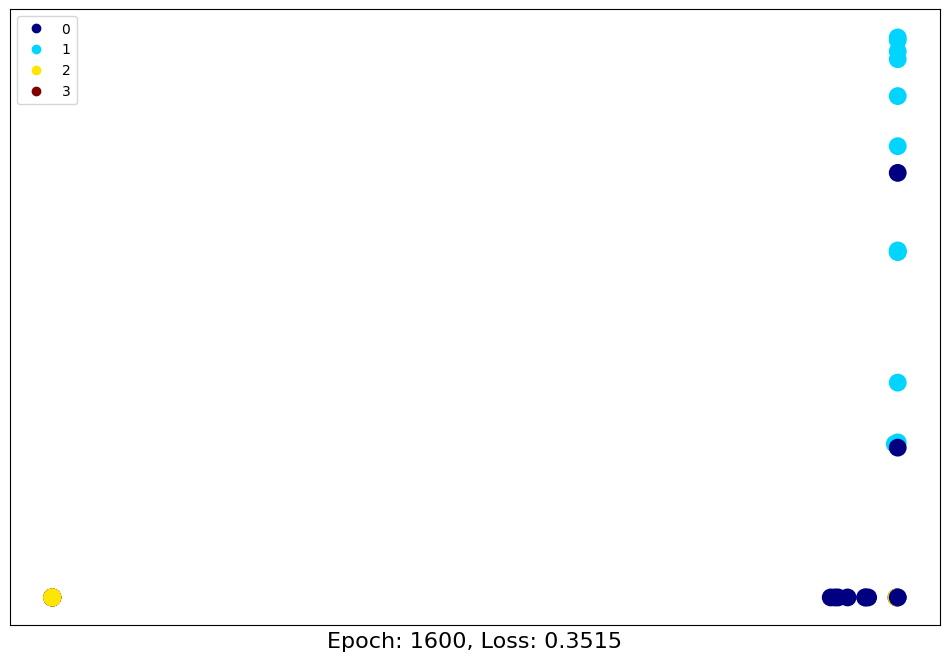

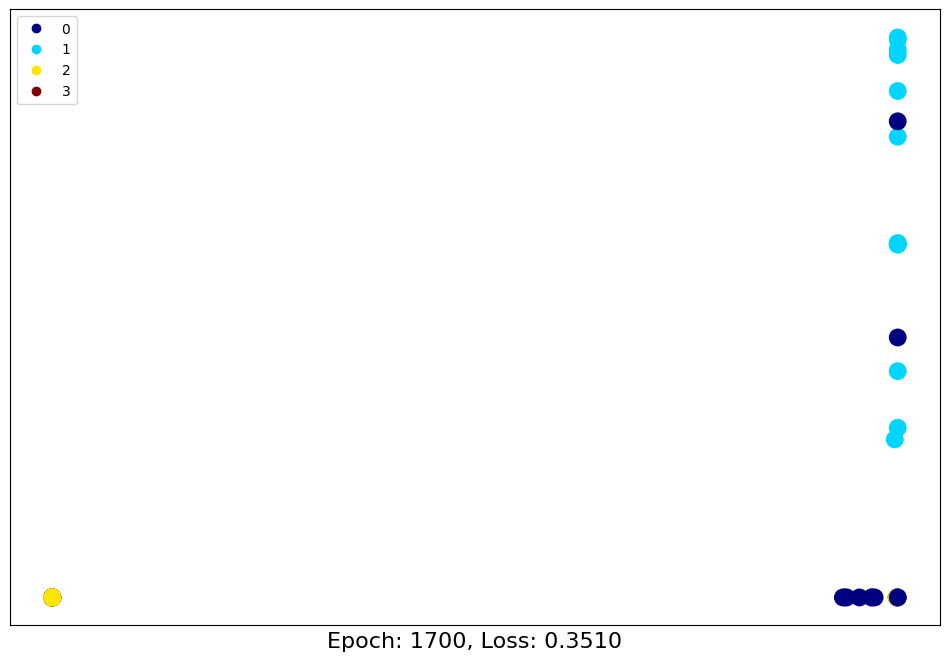

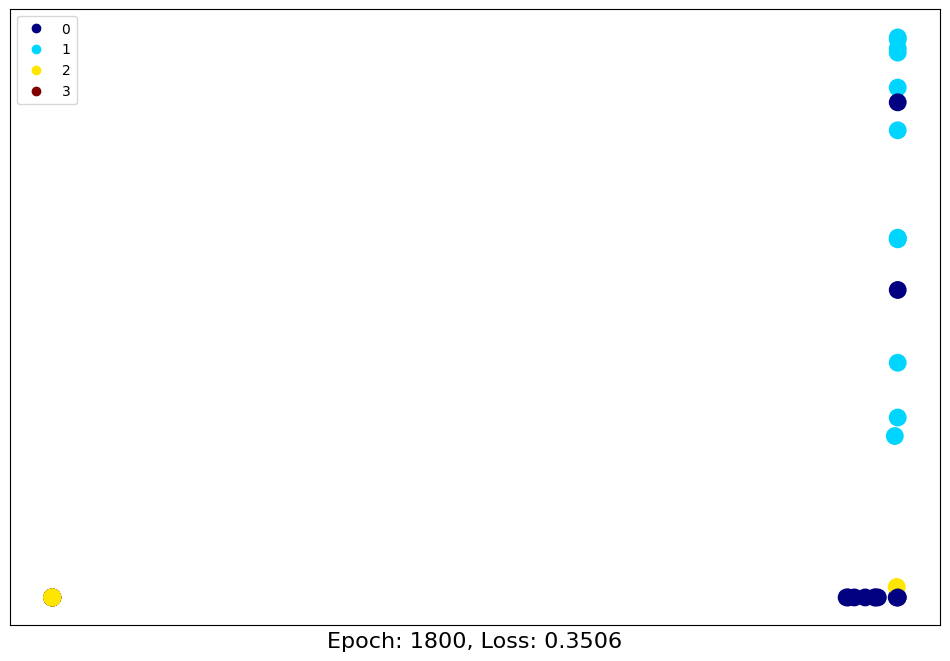

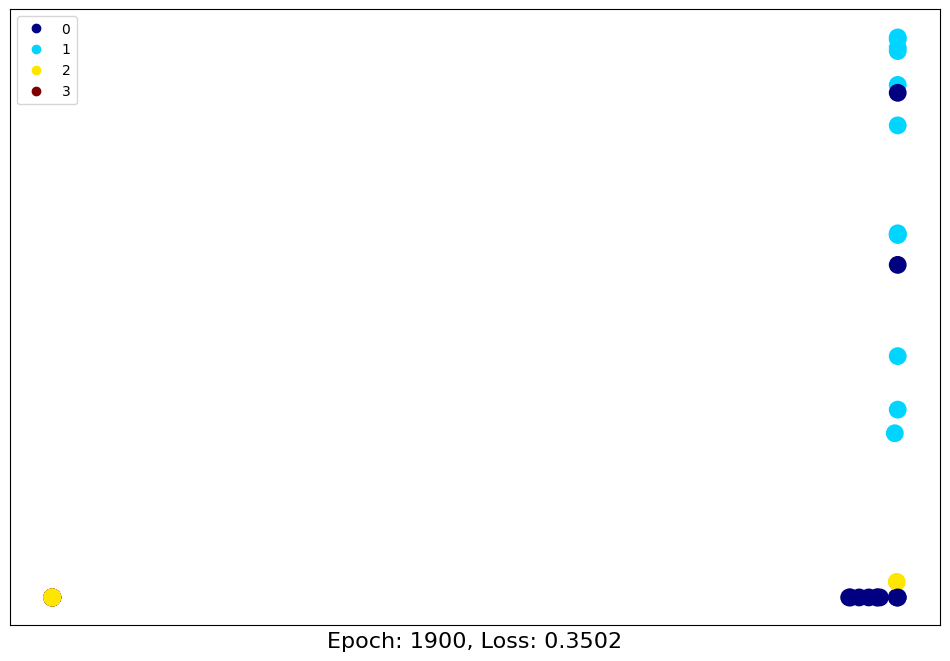

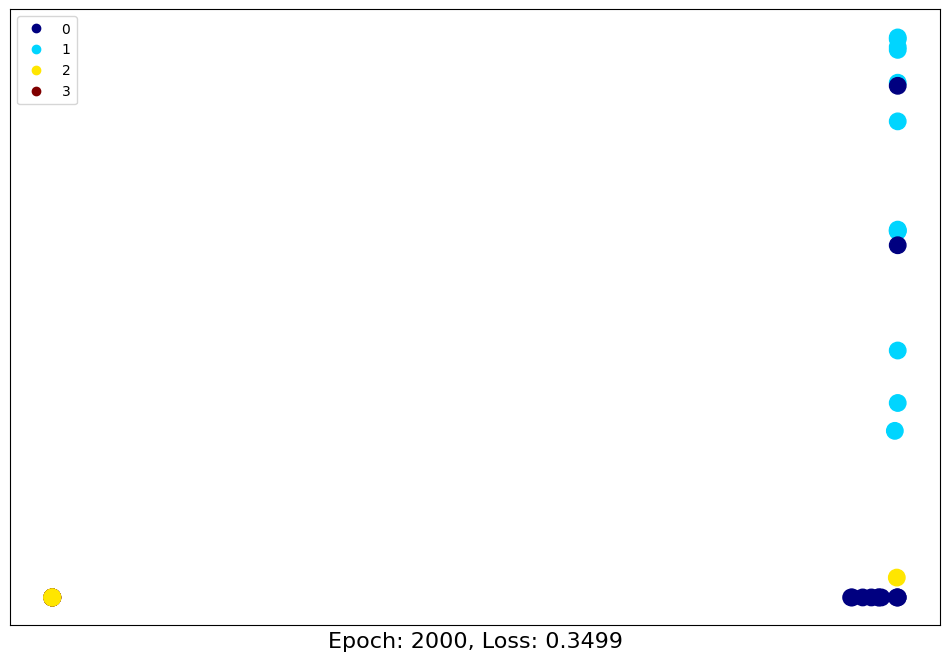

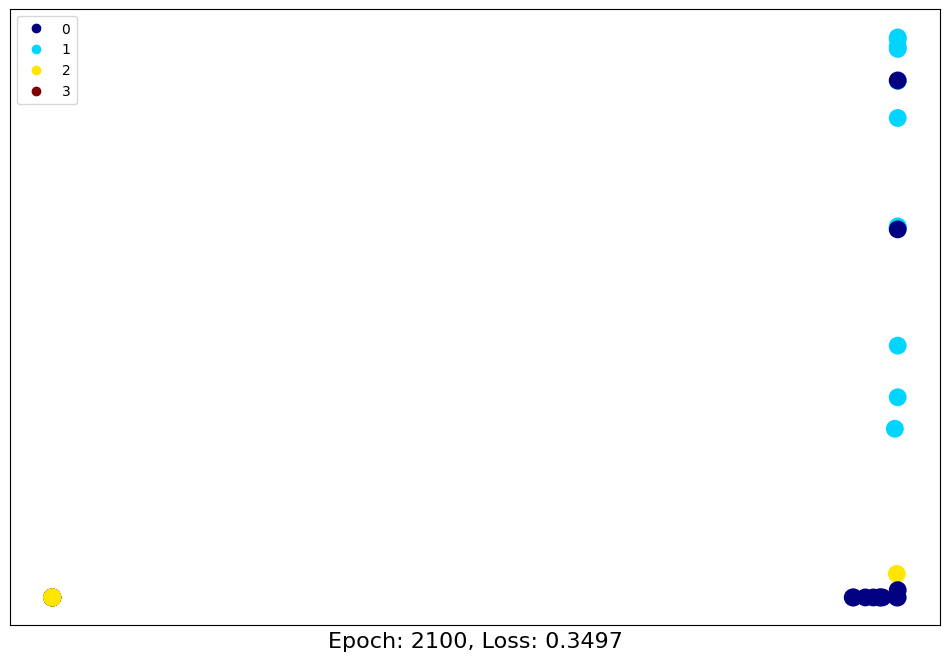

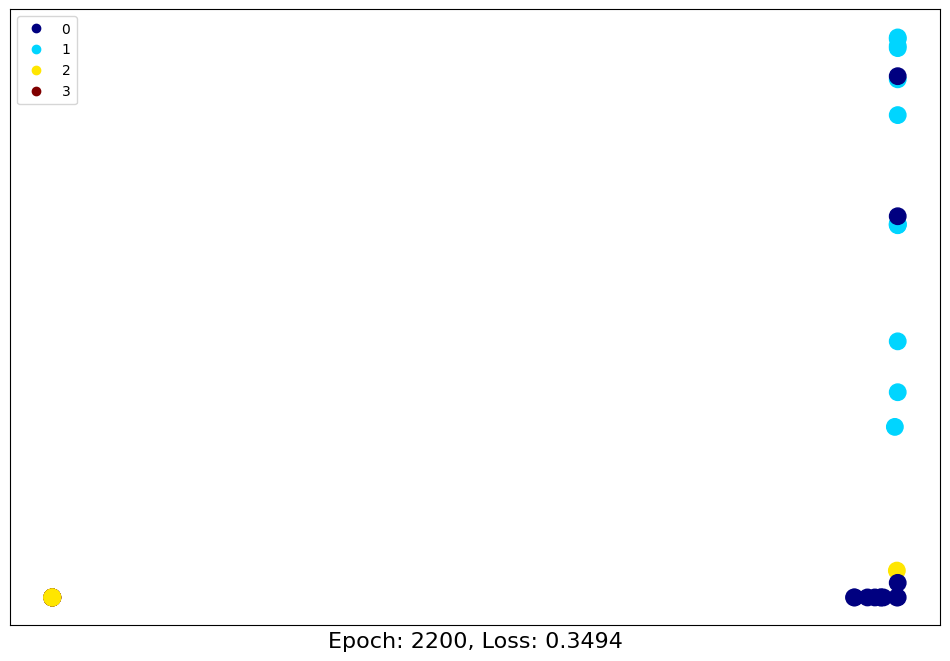

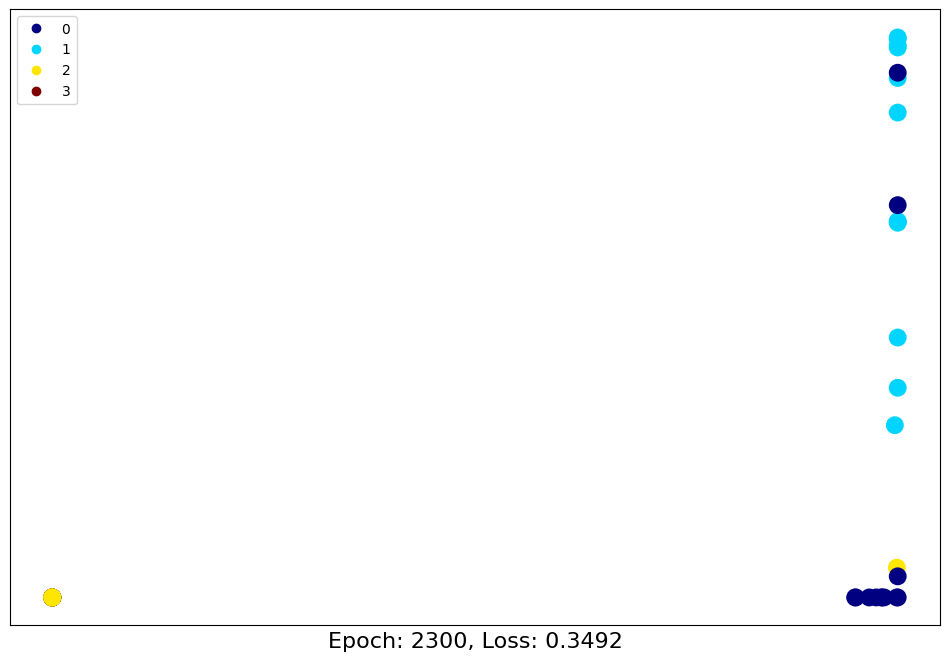

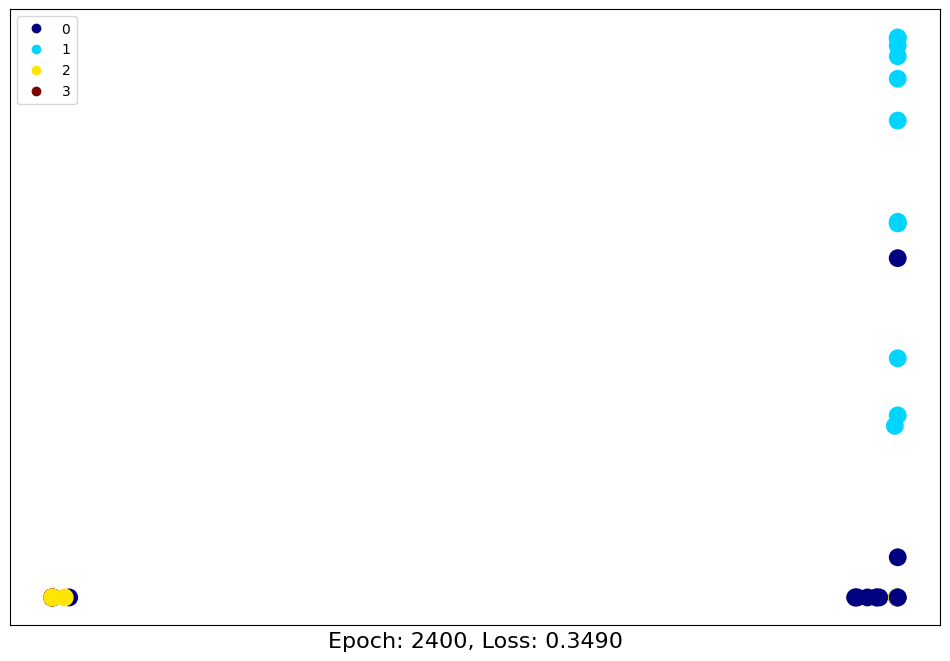

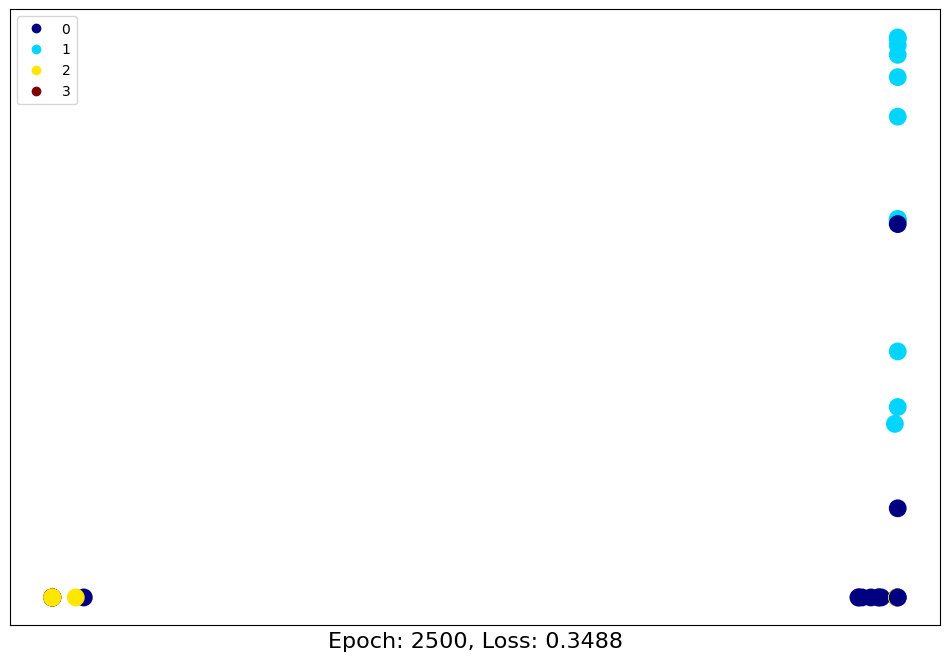

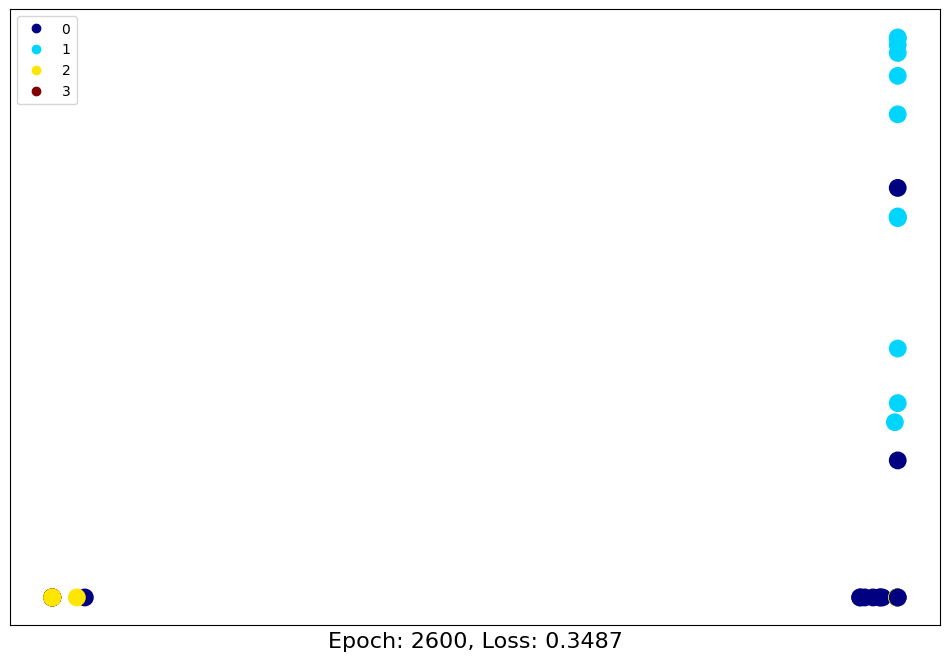

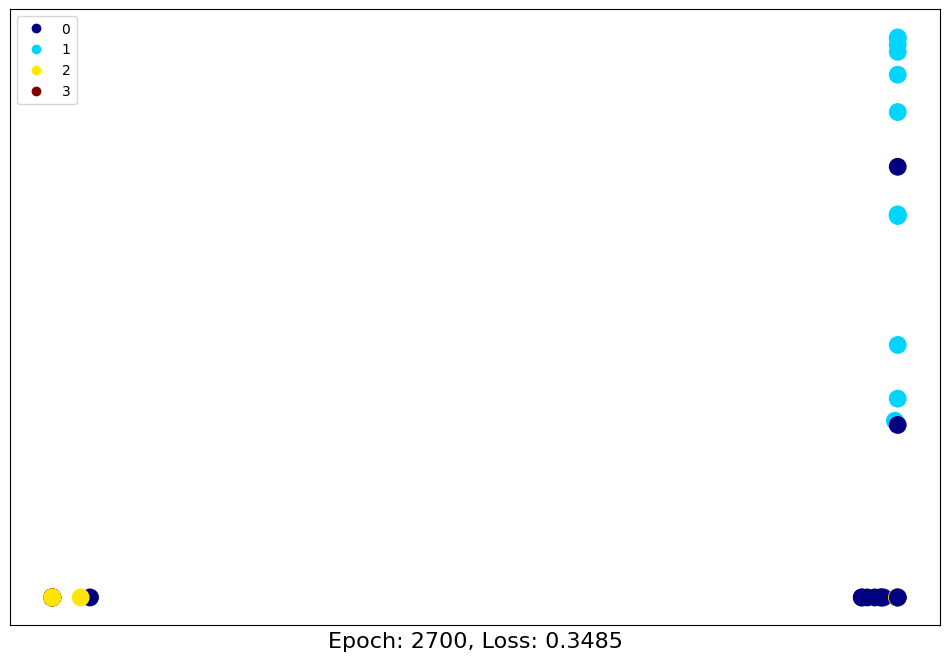

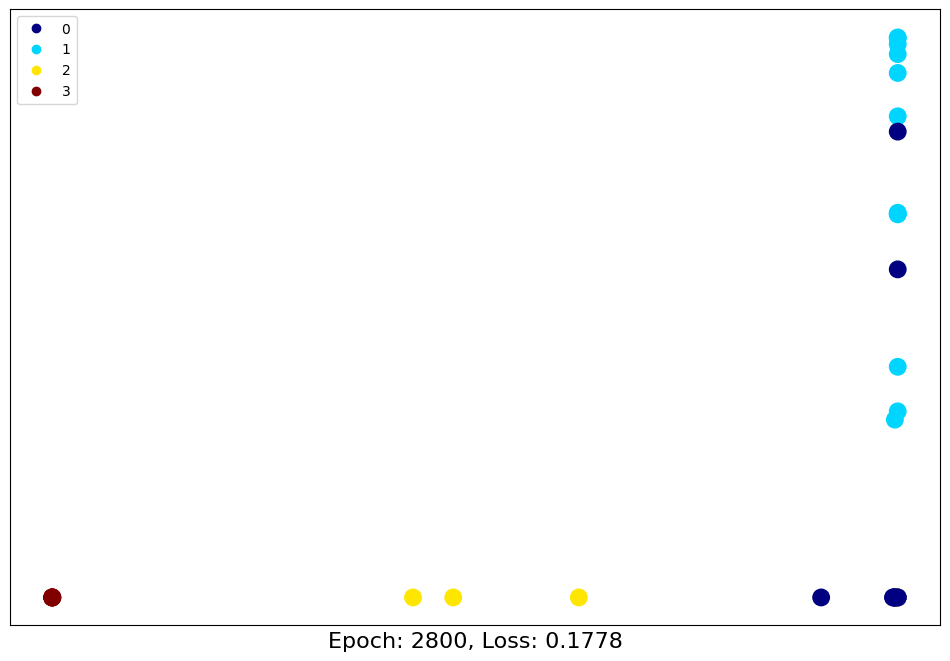

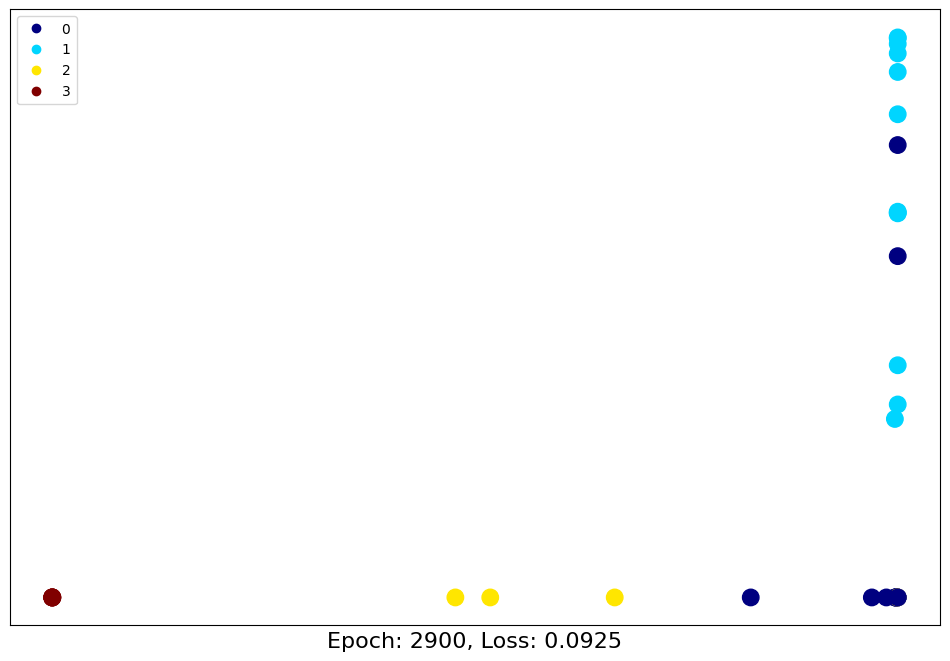

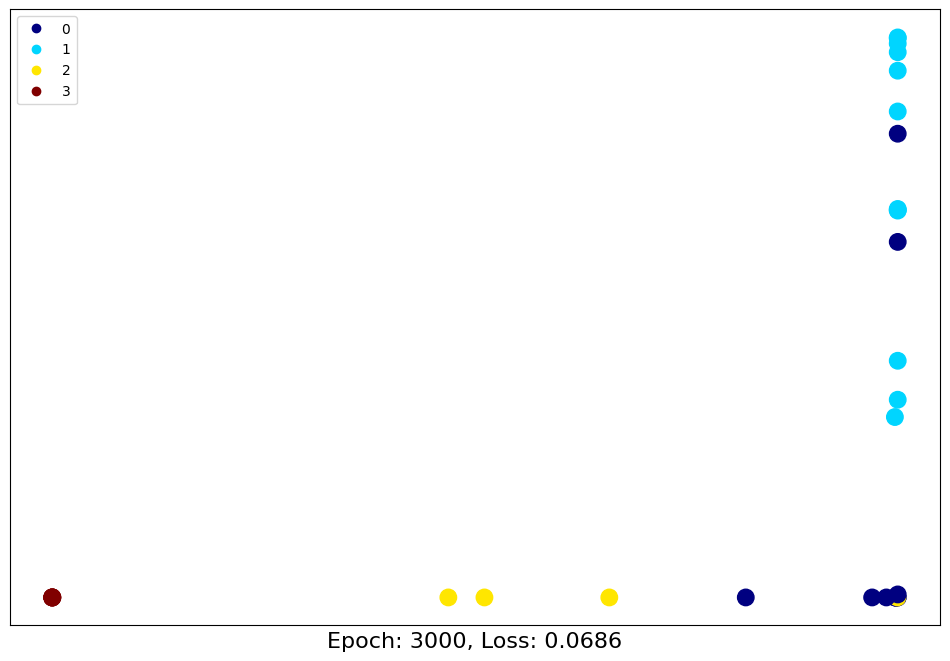

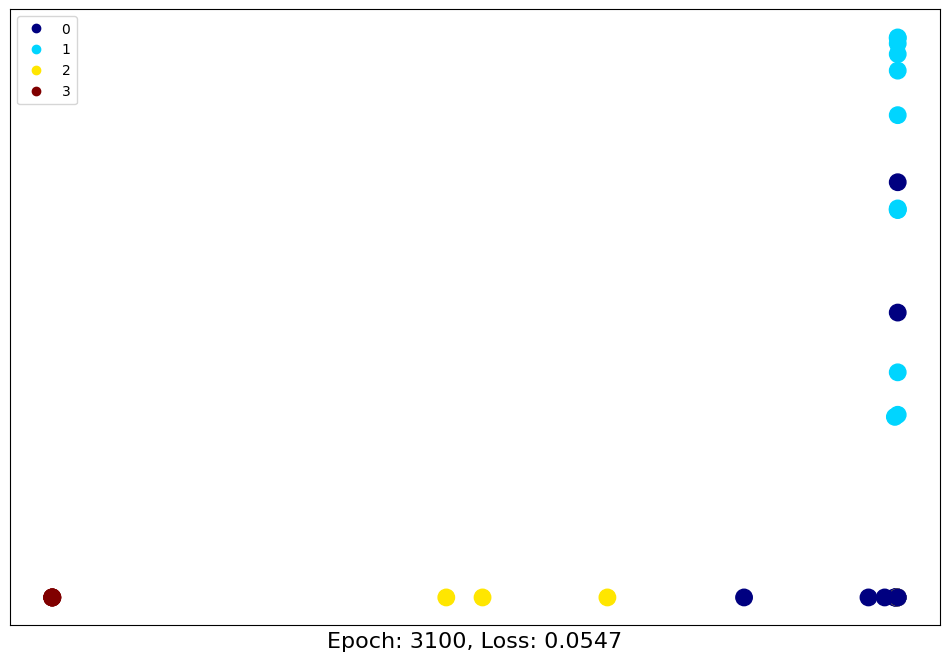

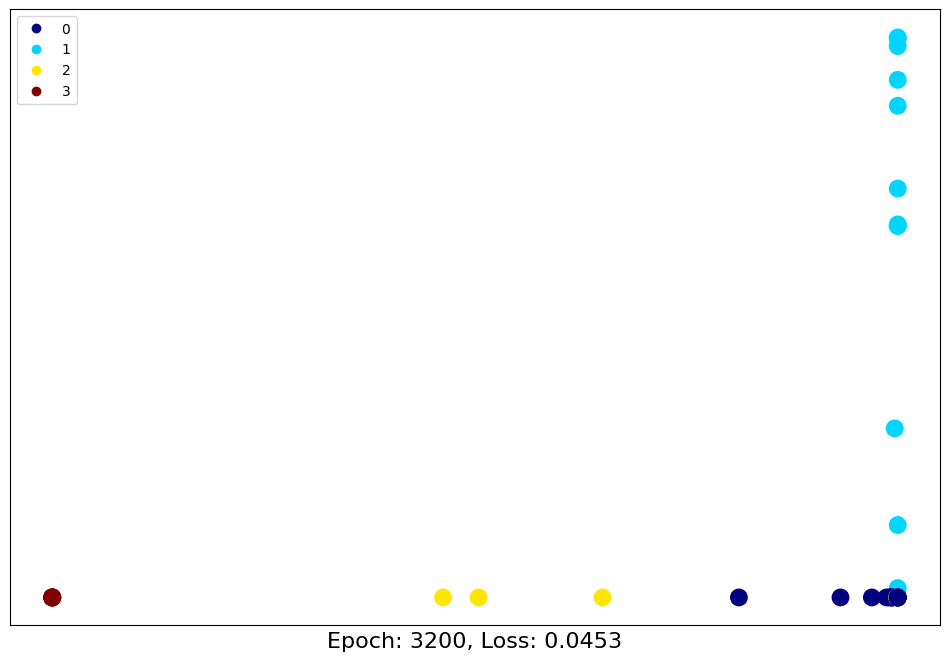

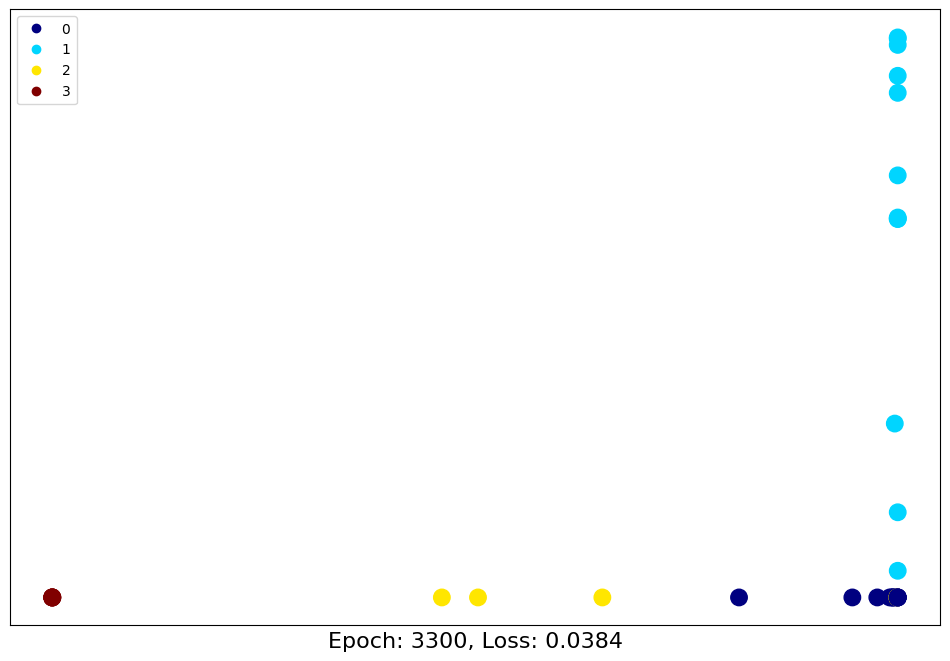

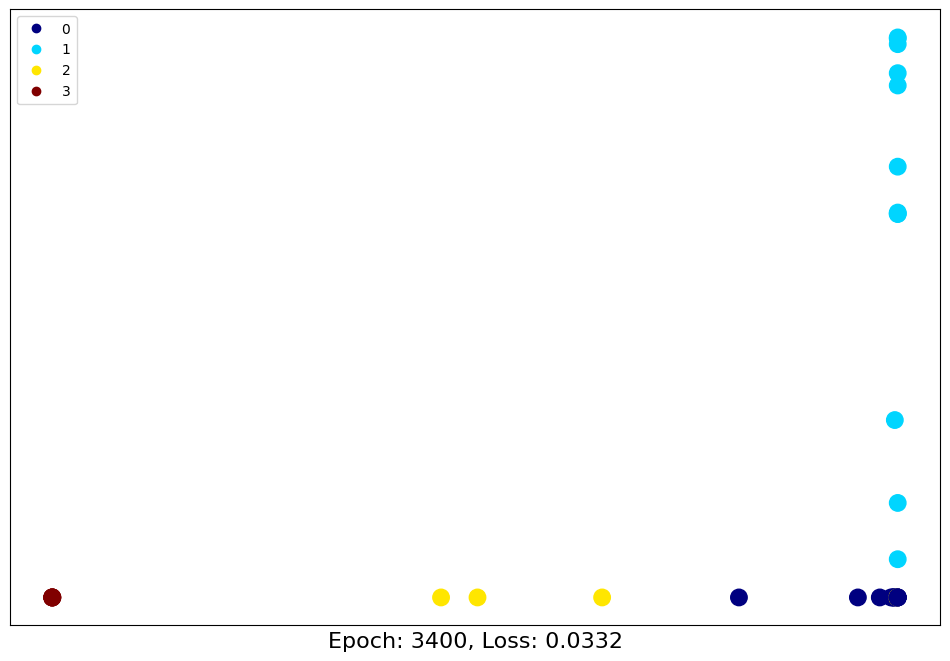

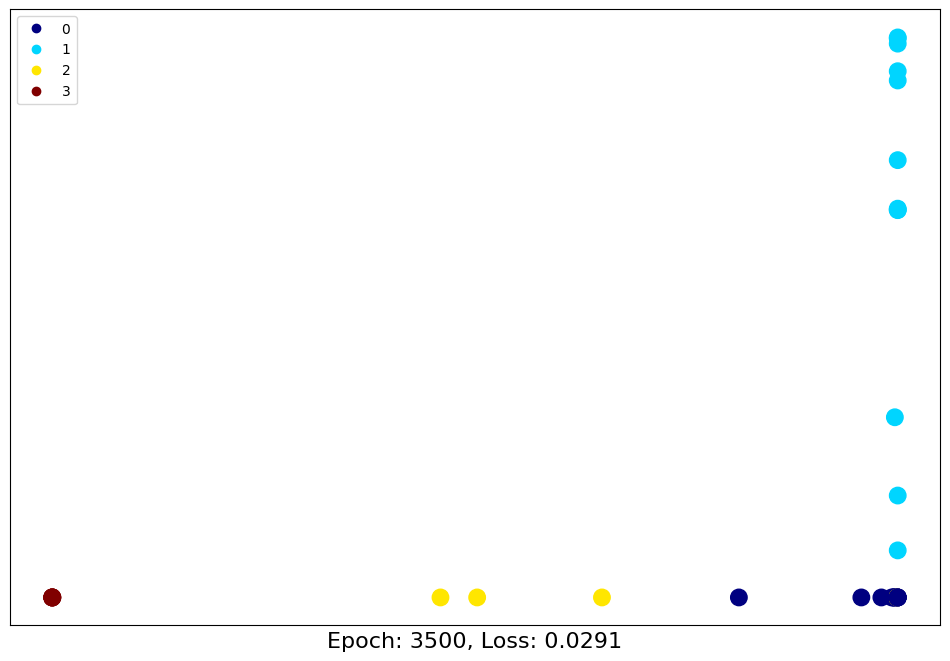

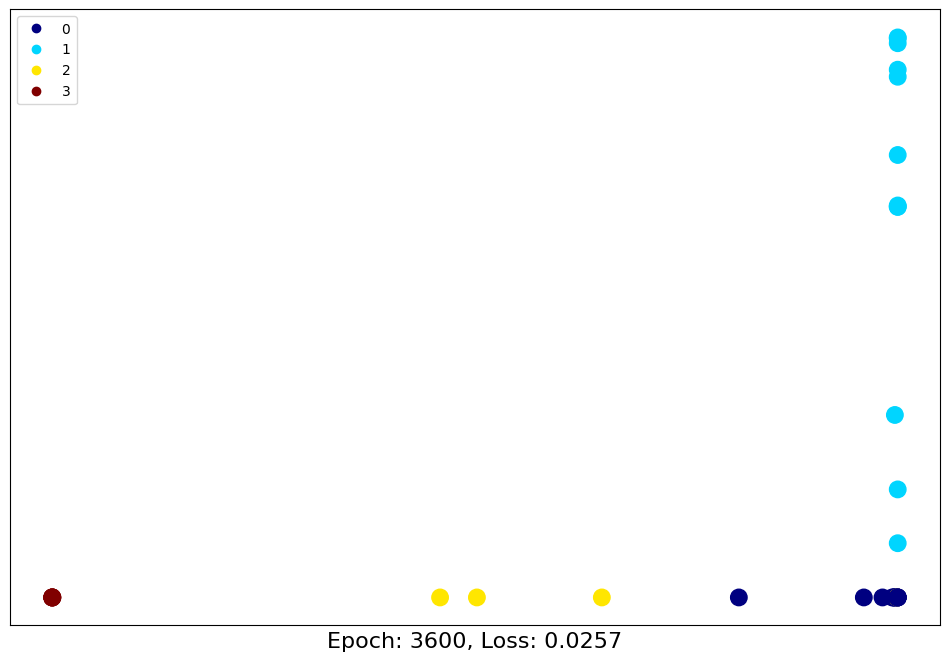

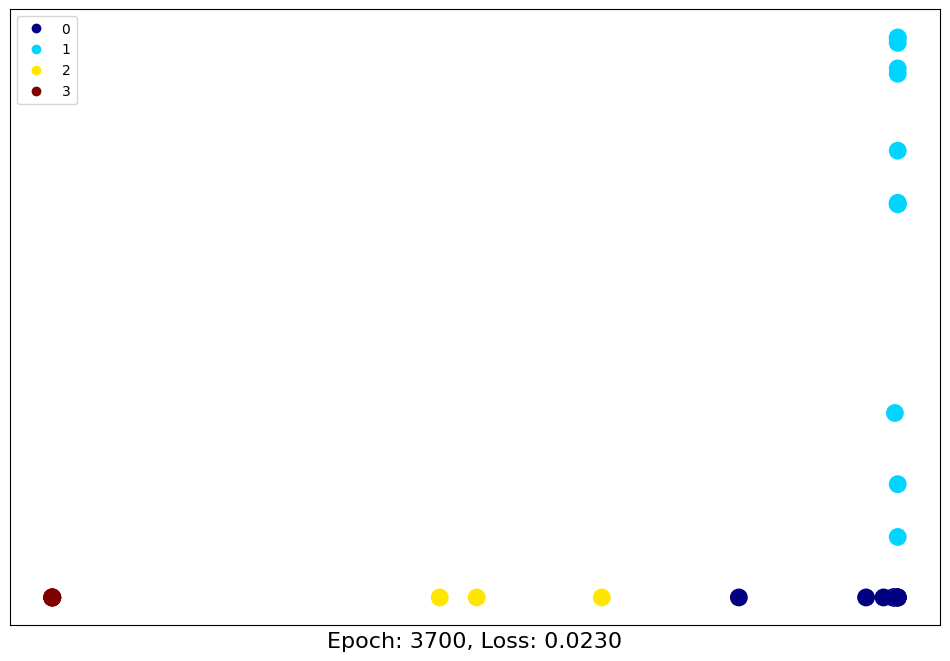

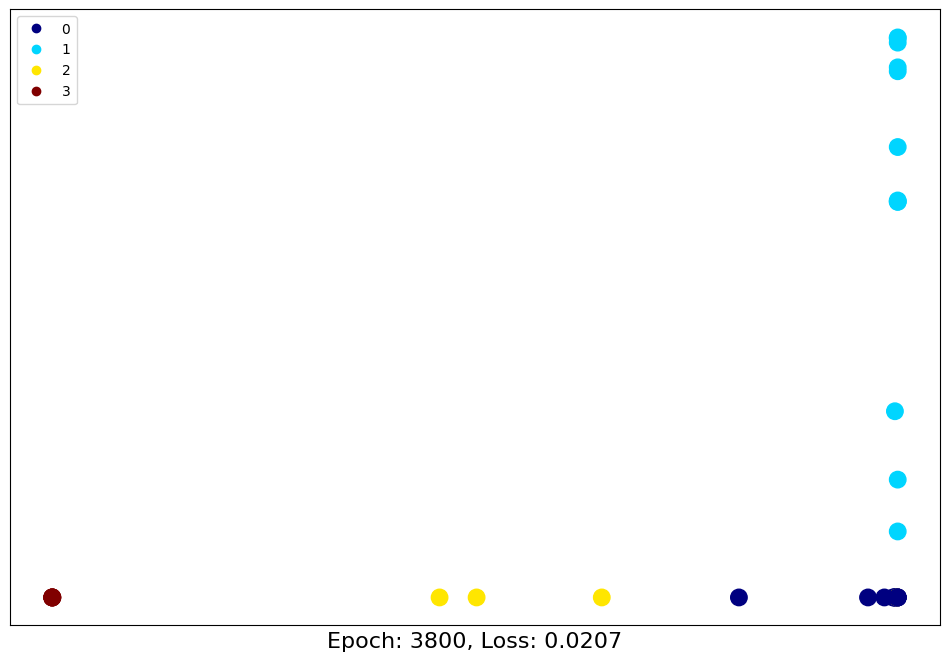

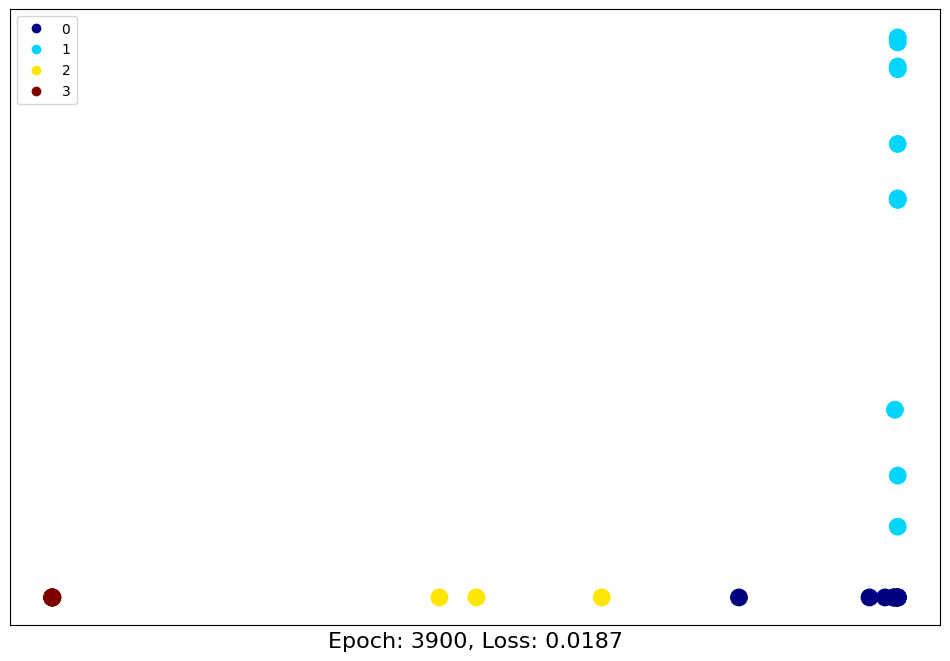

In [507]:
import time
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_custom.parameters(), lr=0.01)

for epoch in range(4000):
    loss, h = train(data, model_custom, criterion, optimizer)
    if epoch % 100 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)
        final_h = h

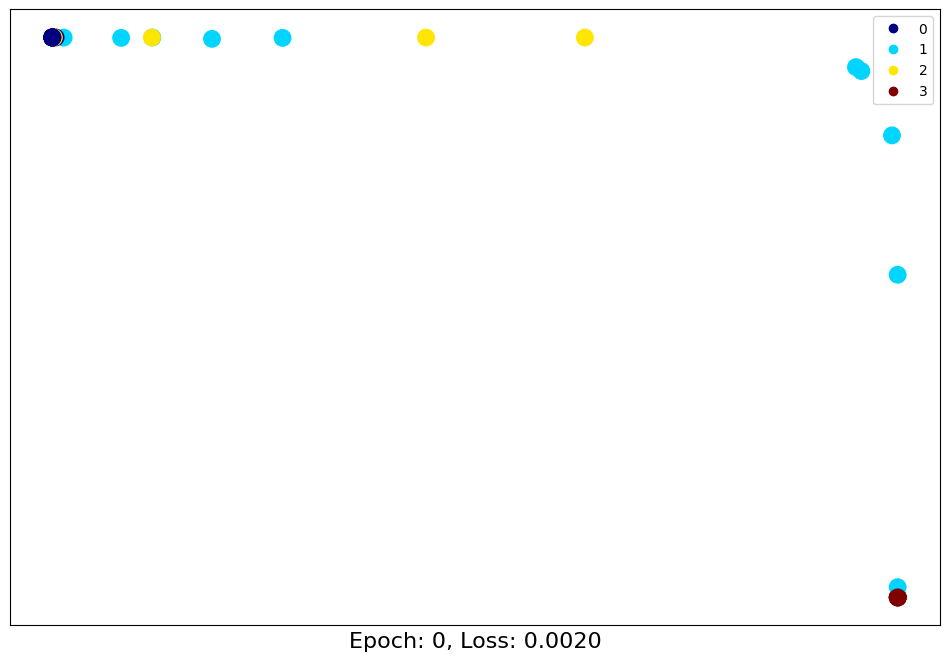

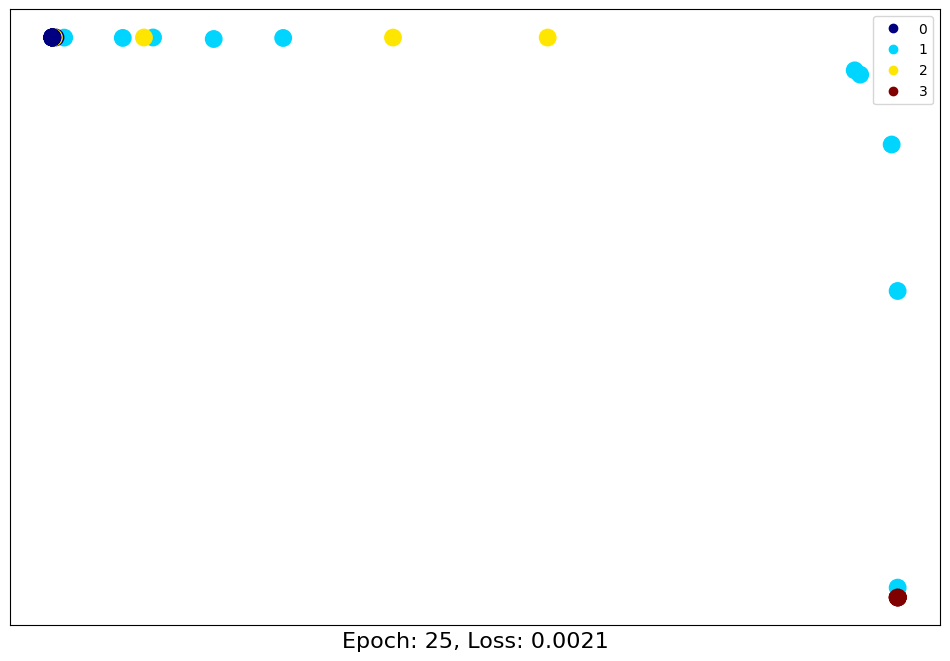

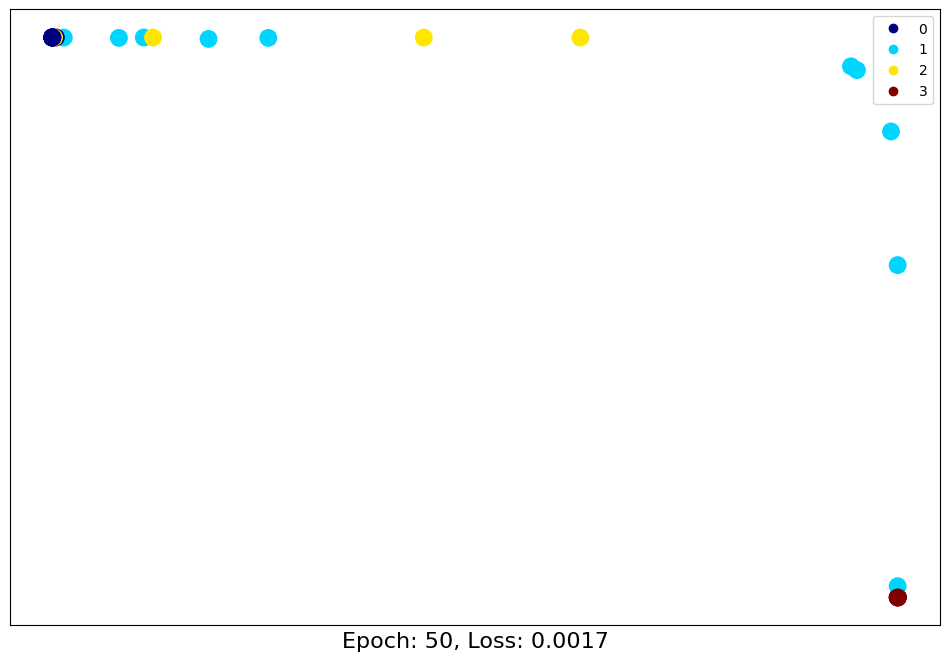

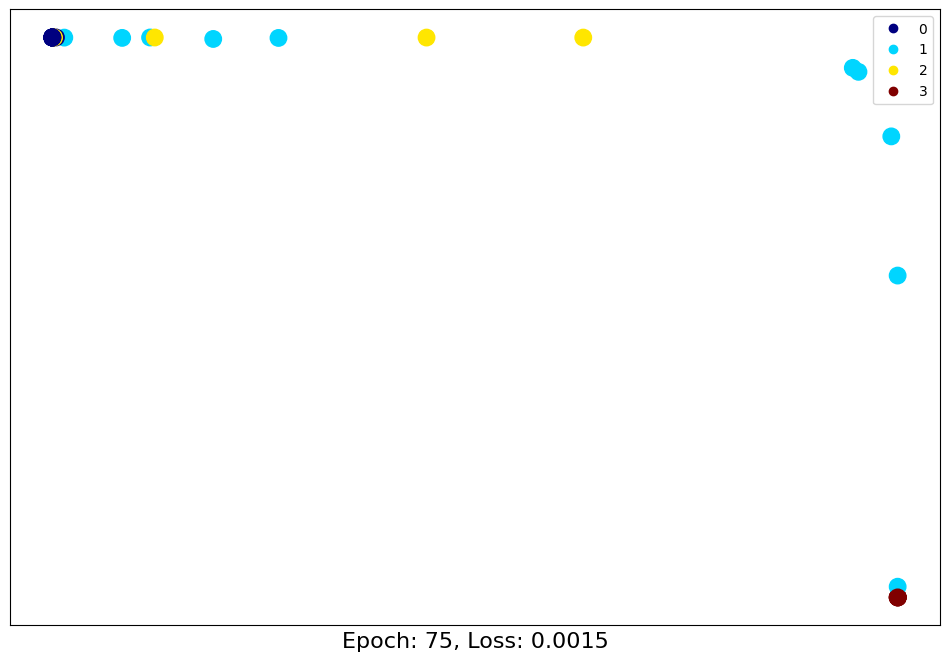

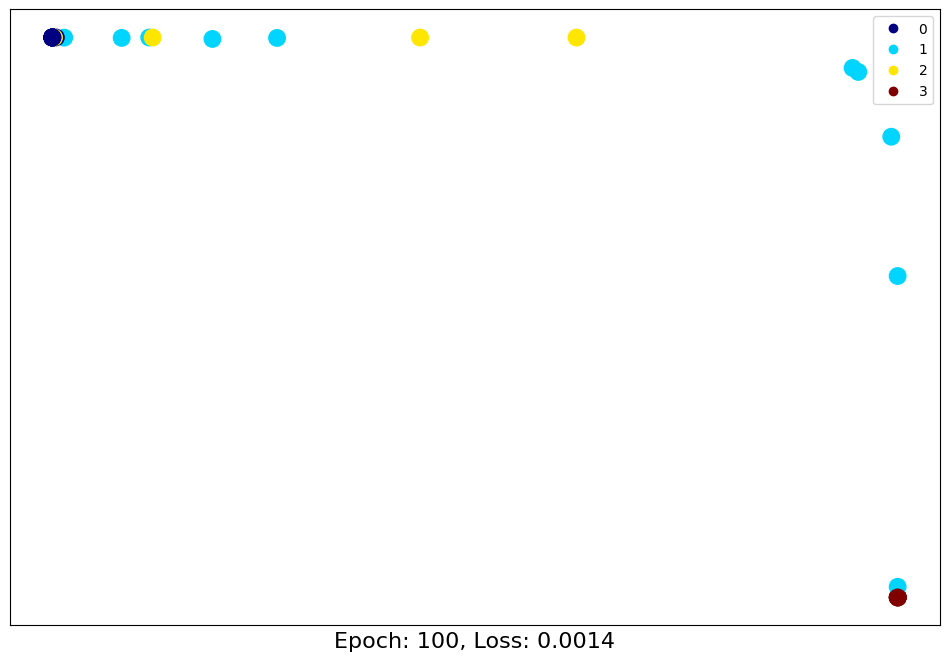

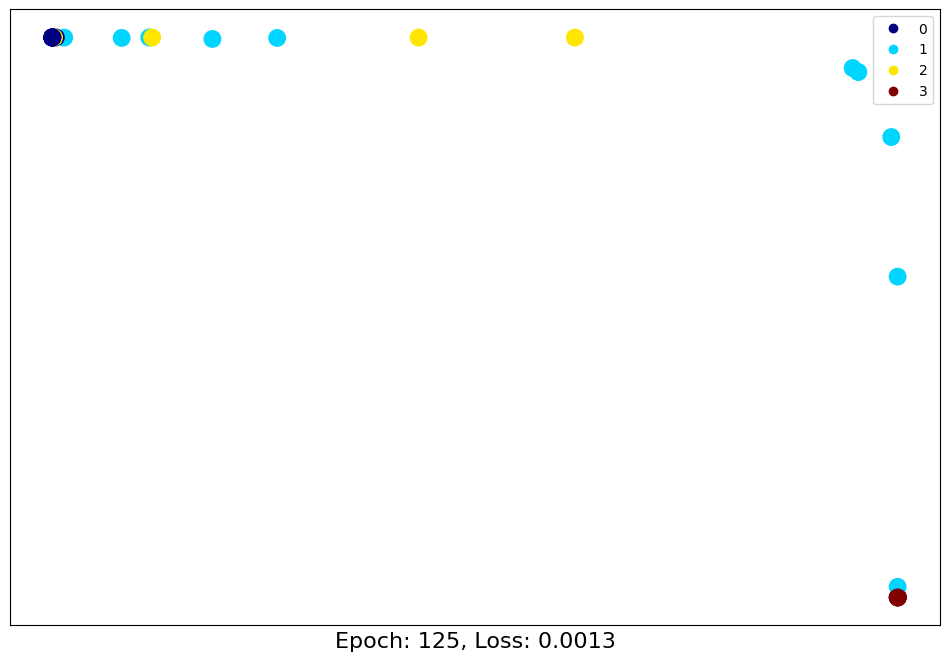

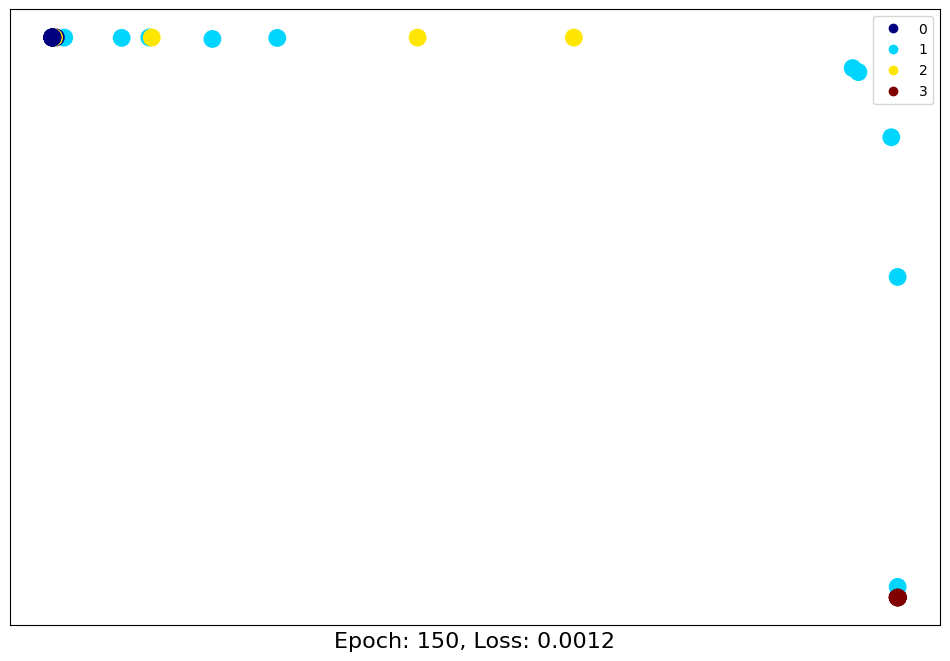

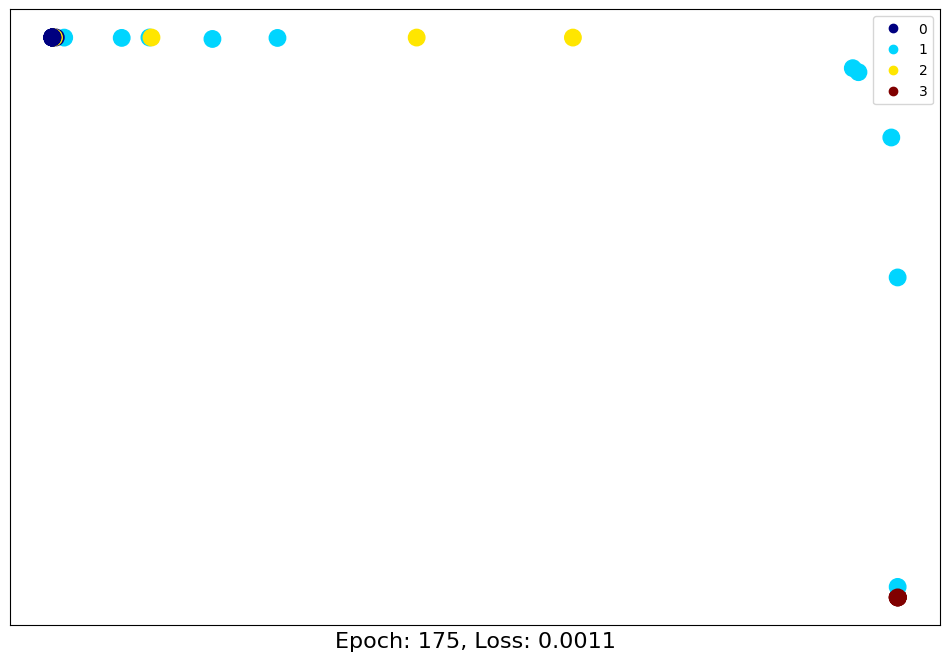

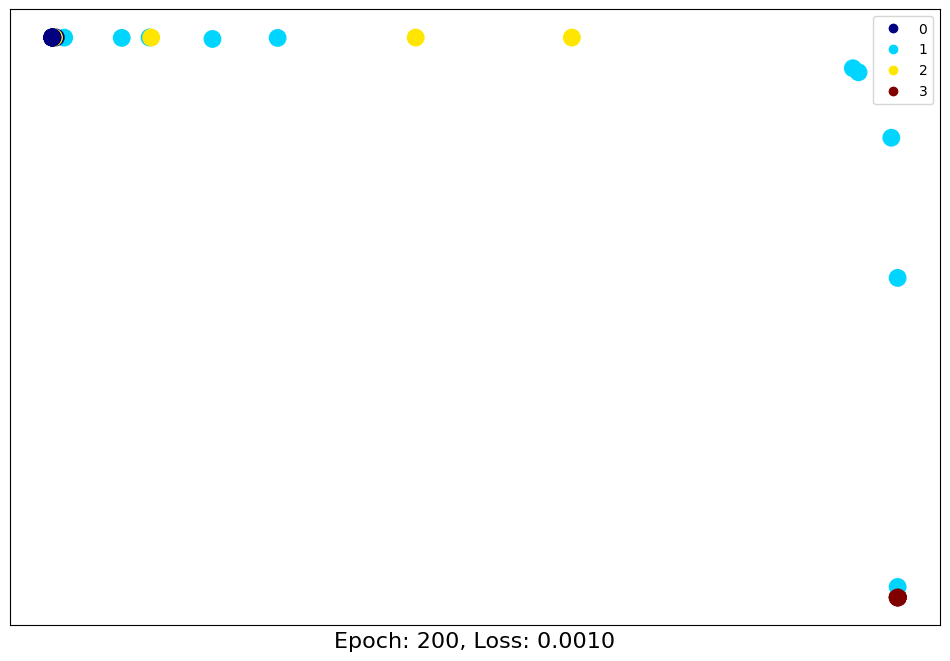

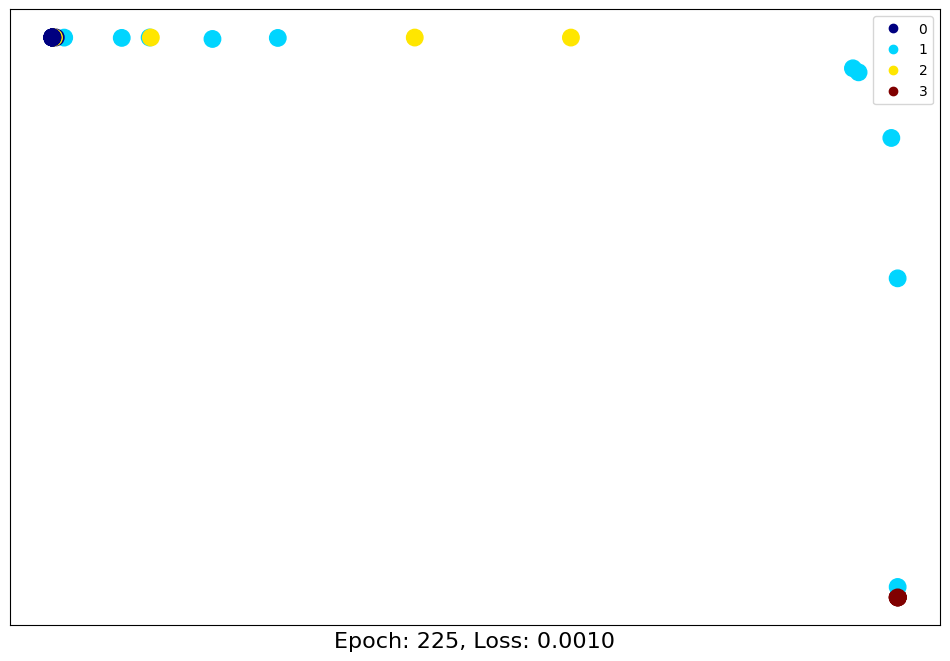

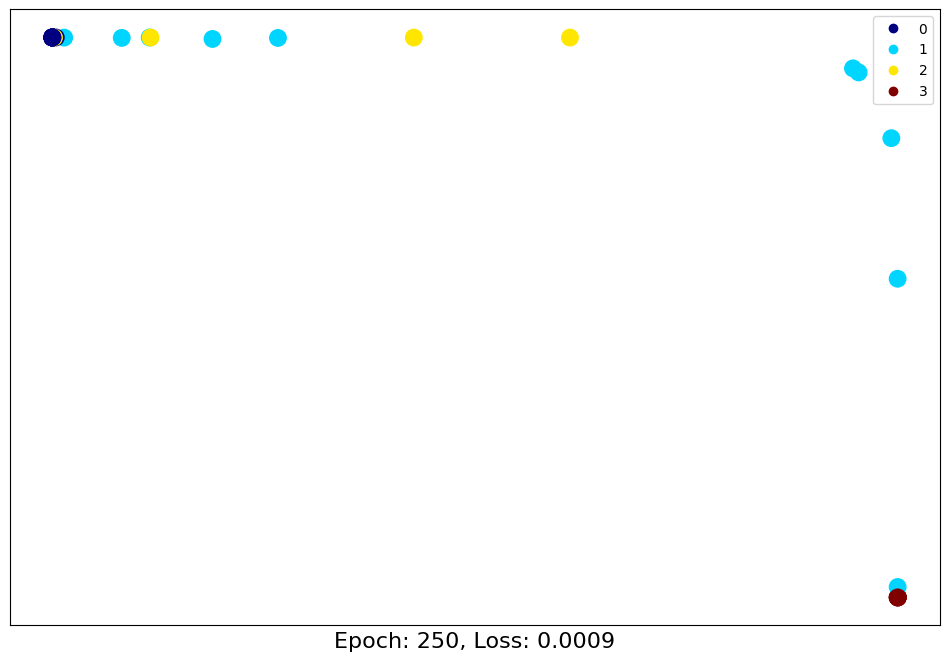

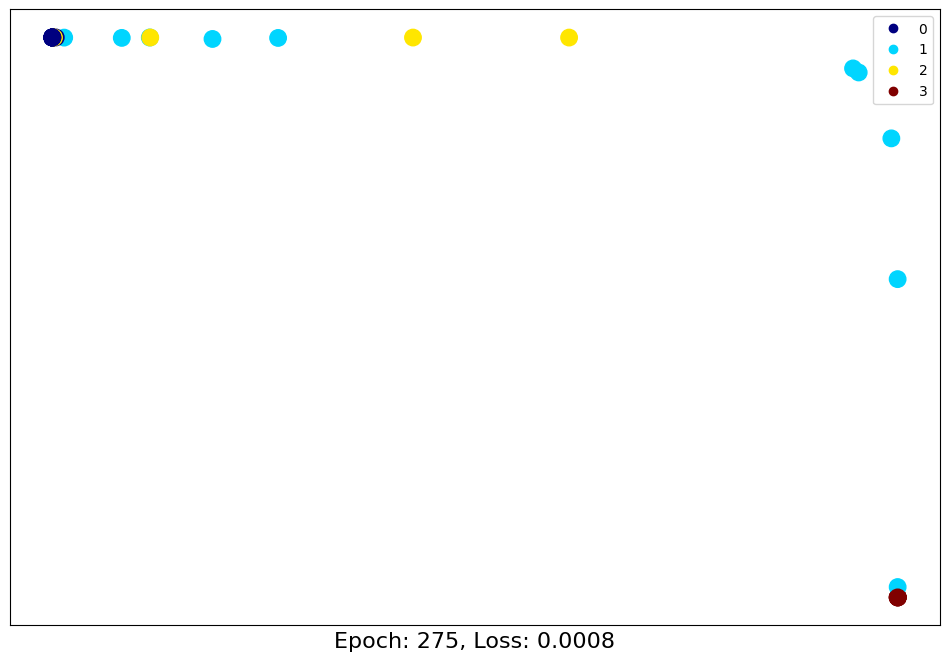

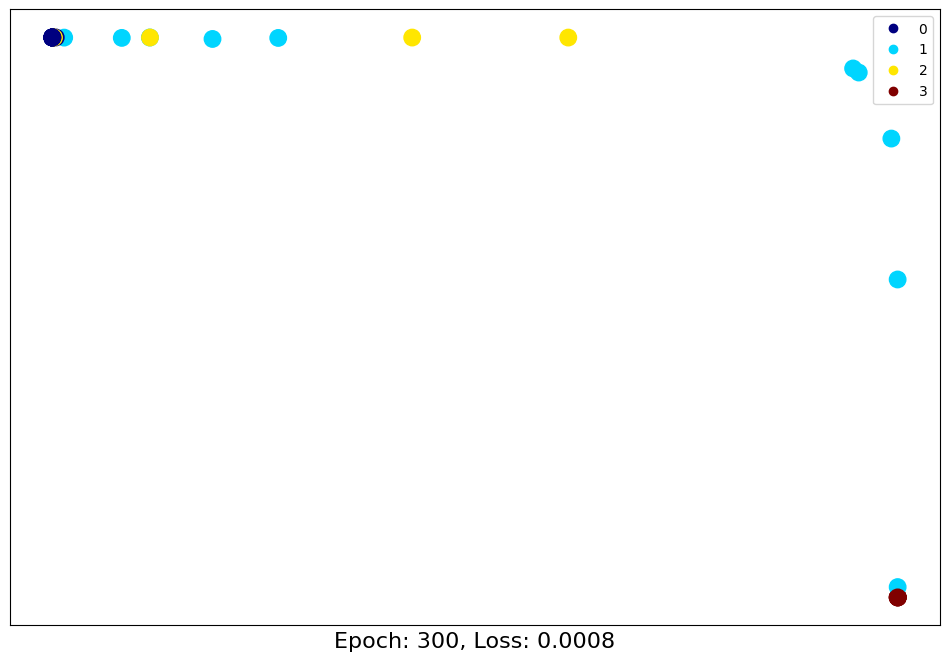

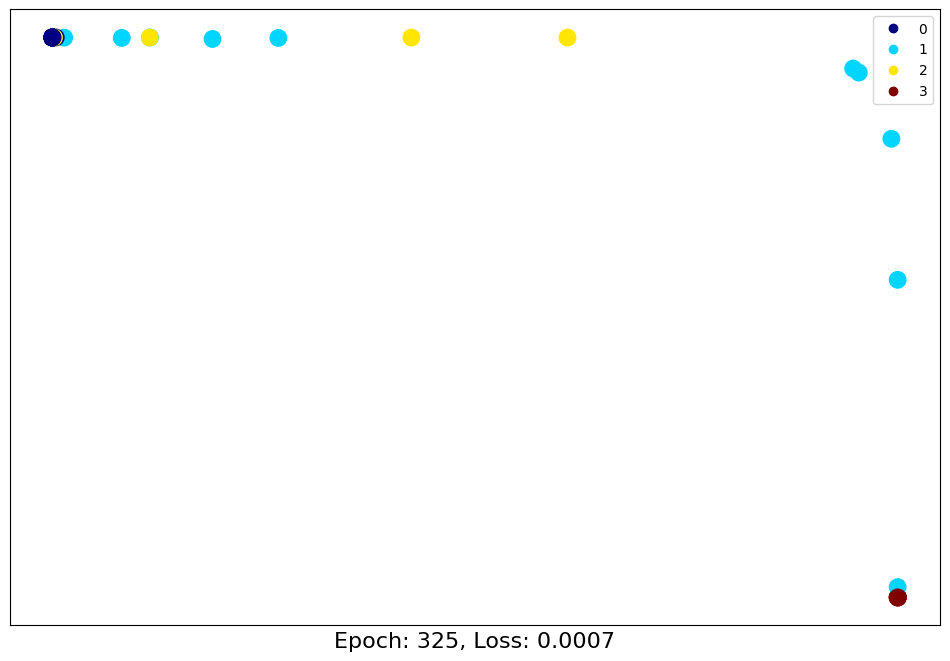

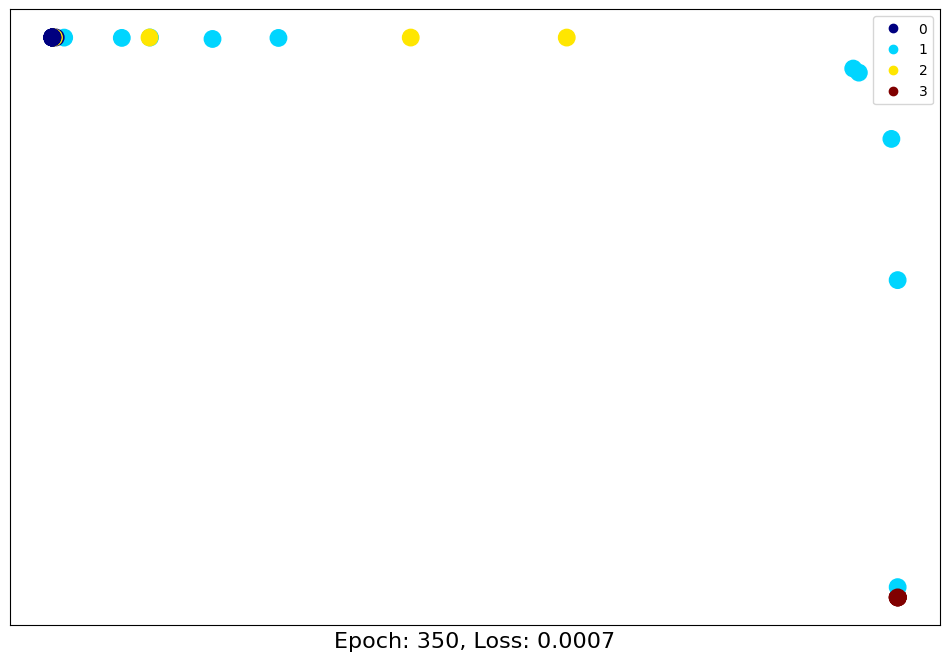

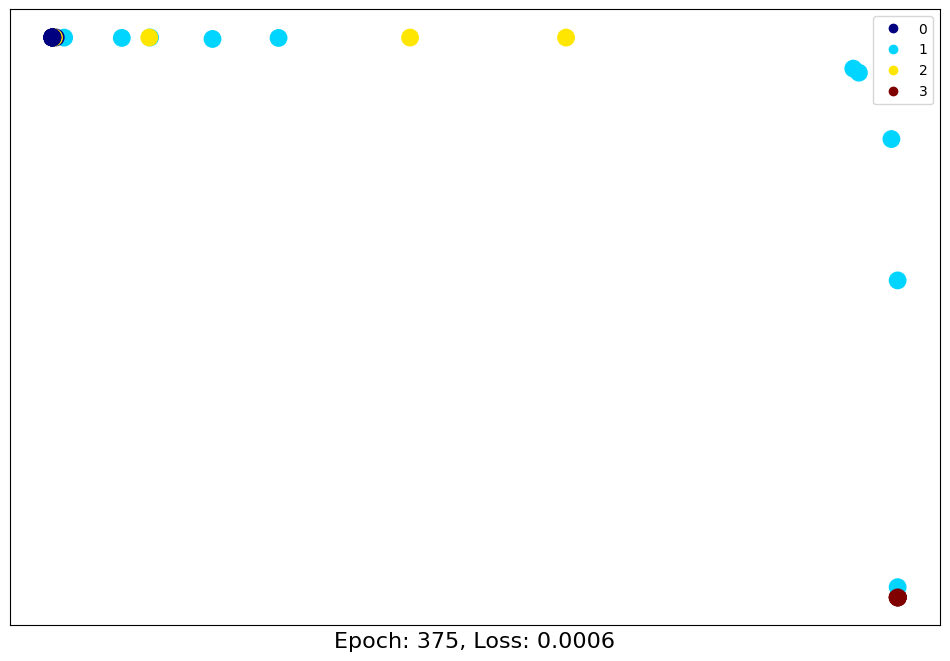

In [398]:
import time
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_custom1.parameters(), lr=0.01)

for epoch in range(400):
    loss, h = train(data, model_custom1, criterion, optimizer)
    if epoch % 25 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)
        final_h = h

## Node classification

In this part a model will be build that will predict a node's topic, based on the nodes it cites, it is cited by. The dataset used is Cora. A citation network.


In [167]:
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
import torch.nn as nn

In [418]:
dataset = Planetoid(root='/tmp/Cora', name='Cora', transform=NormalizeFeatures())
data = dataset[0]
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [419]:
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes (papers): {data.num_nodes}')
print(f'Number of edges (citations): {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of features per node: {dataset.num_node_features}')
print(f'Number of features per edge: {dataset.num_edge_features}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is Directed: {data.is_directed()}')
print(f'Is undirected: {data.is_undirected()}')
print(f'Edge weight: {data.edge_weight}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Number of test nodes: {data.test_mask.sum()}')
print(f'Number of validation nodes: {data.val_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Number of classes (subjects): {dataset.num_classes}')

Number of nodes (papers): 2708
Number of edges (citations): 10556
Average node degree: 3.90
Number of features per node: 1433
Number of features per edge: 0
Has isolated nodes: False
Has self-loops: False
Is Directed: False
Is undirected: True
Edge weight: None
Number of training nodes: 140
Number of test nodes: 1000
Number of validation nodes: 500
Training node label rate: 0.05
Number of classes (subjects): 7


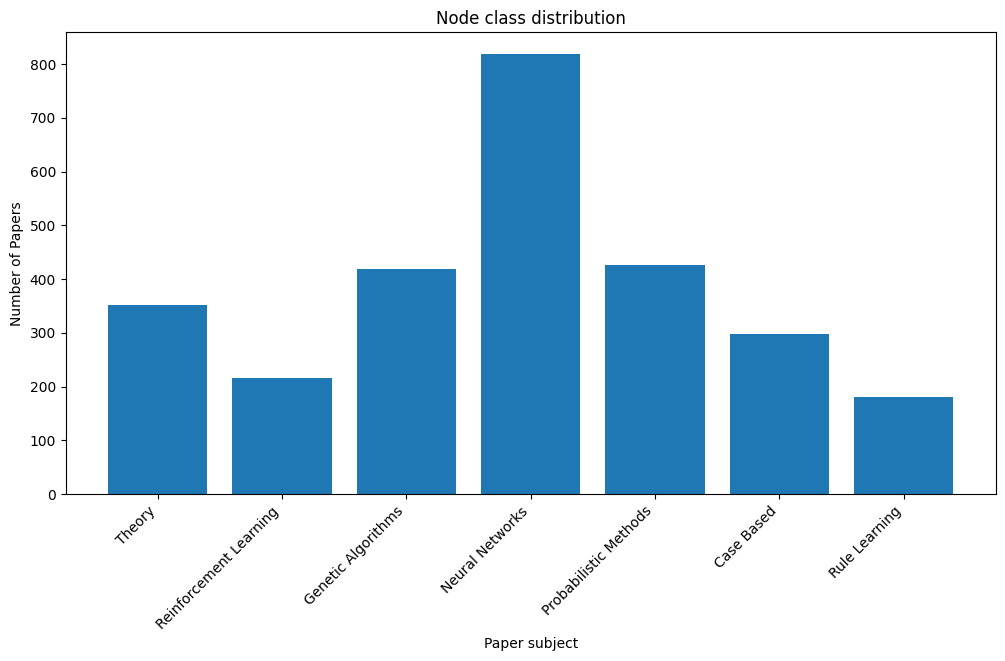

In [442]:
import matplotlib
class_counts = torch.bincount(data.y)
class_names = ['Theory', 'Reinforcement Learning', 'Genetic Algorithms', 
               'Neural Networks', 'Probabilistic Methods', 'Case Based', 'Rule Learning']
class_colors = []

"""r = random.random
for i in range(0,len(class_names)):
    rgb =  (r(),r(),r())
    class_colors.append(rgb)"""


colors = matplotlib.colormaps['Dark2'].colors
for i in range(0,len(class_names)):
     class_colors.append(colors[i])



plt.figure(figsize=(12, 6))
plt.bar(class_names, class_counts)
plt.title('Node class distribution')
plt.xticks(range(len(class_names)), class_names, rotation=45, ha='right')
plt.xlabel('Paper subject')
plt.ylabel('Number of Papers')
plt.show()



### Visualizing a part of the Cora dataset

To get an idea of the datasets' structure a subset of it is visualized below. As not all nodes are connected to the selected nodes, only some 'complete' citation structures are visible.

c:\Users\wilfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\drawing\nx_pylab.py:1438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


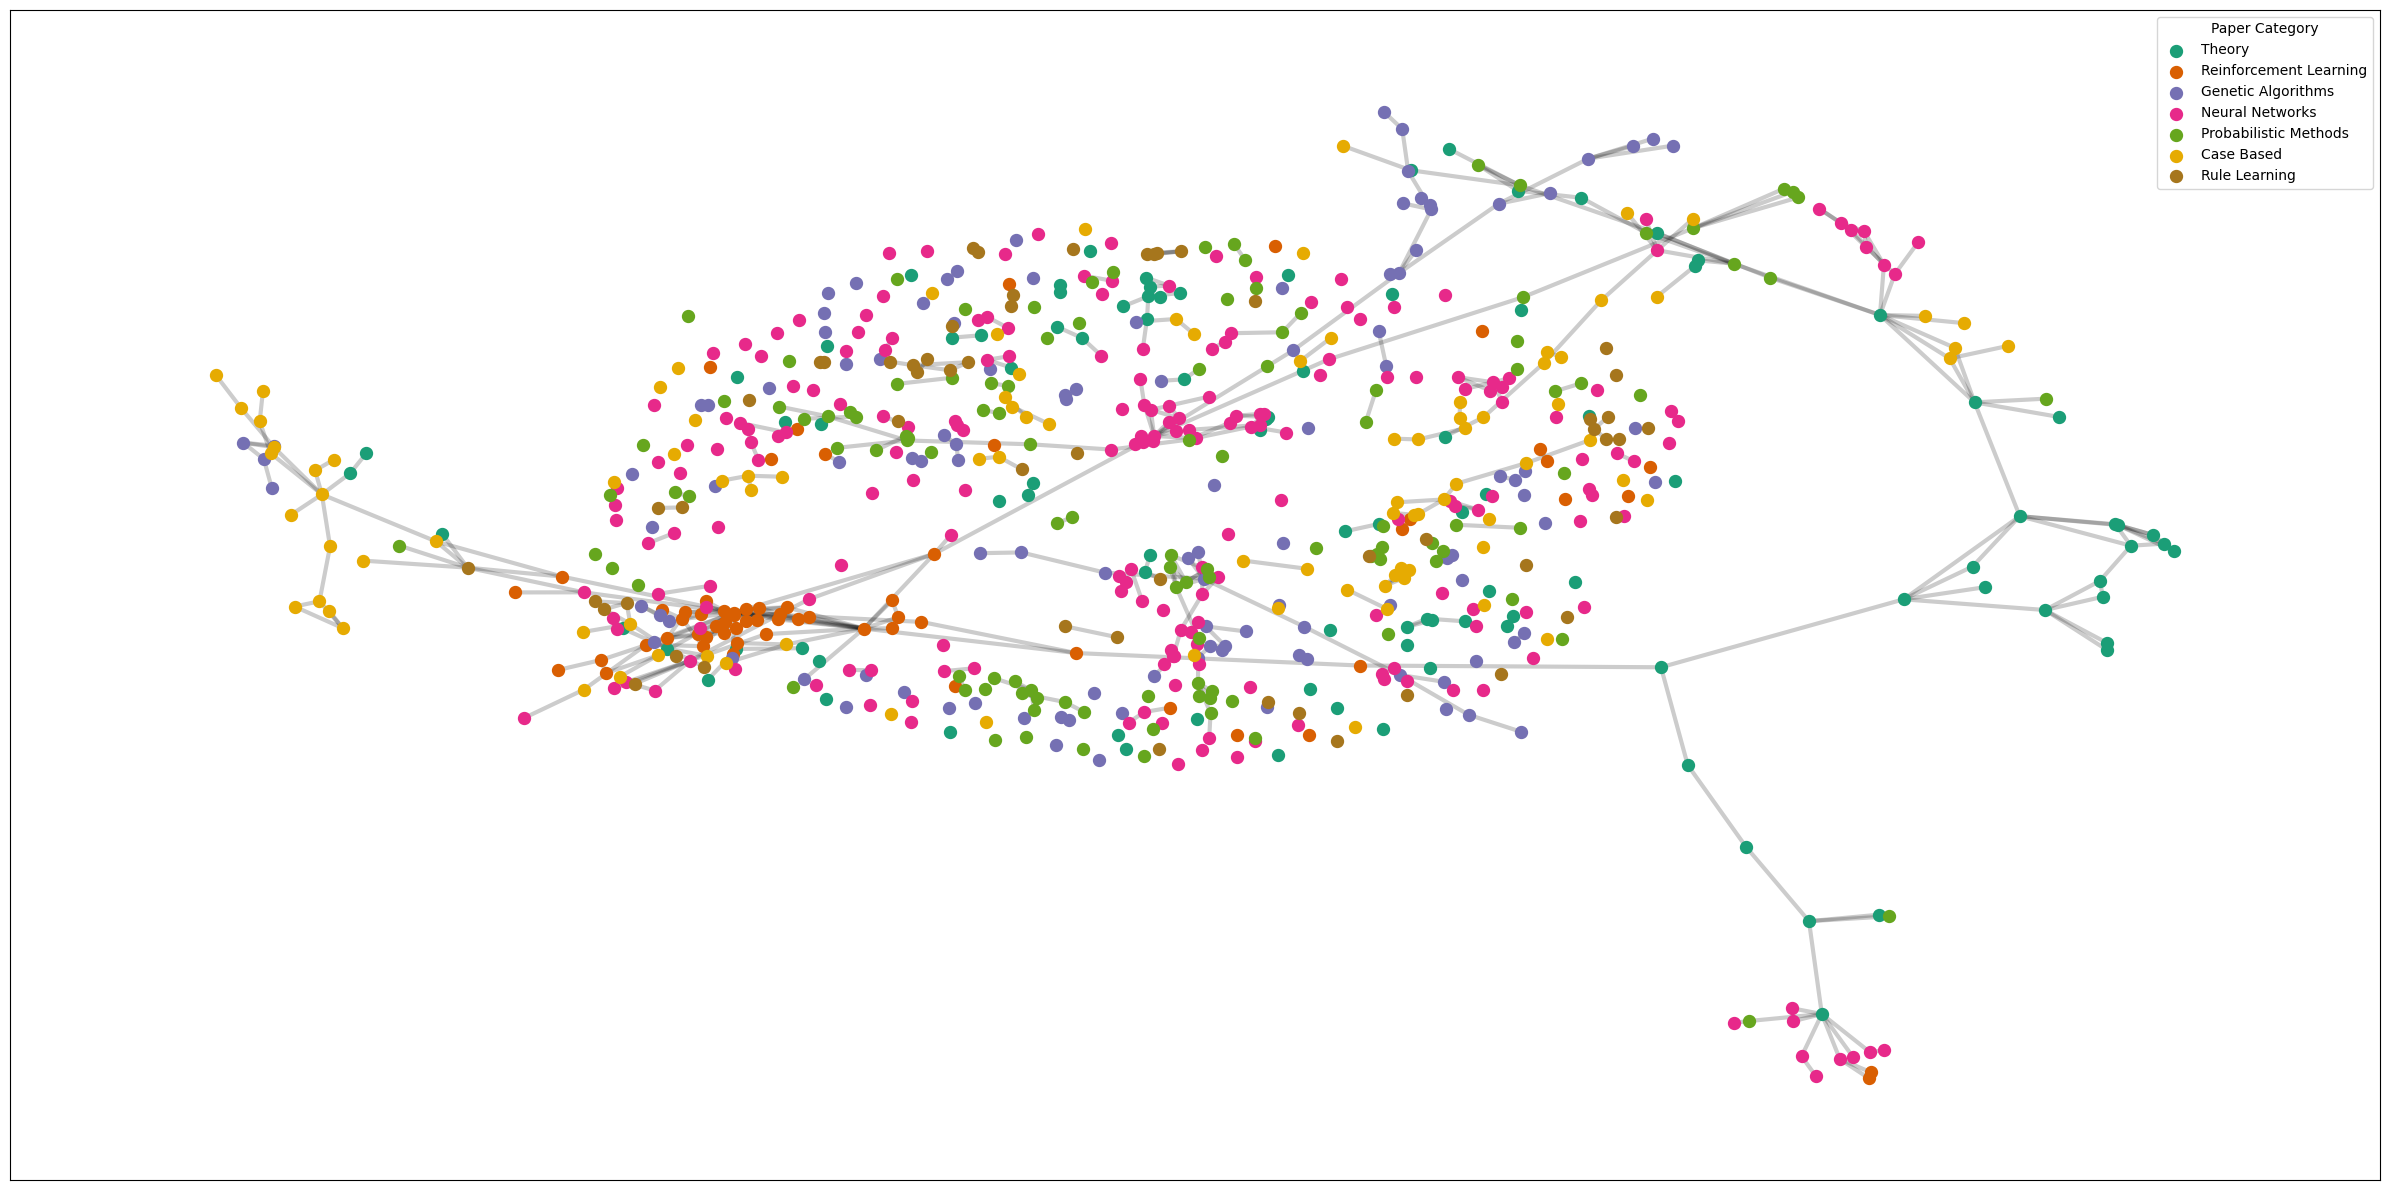

In [443]:
def visualize_graph():
    # Convert to networkx graph
    G = to_networkx(data, to_undirected=True)
    plt.figure(figsize=(24, 12))

    nodes_subset = list(range(750))
    node_labels_subset = data.y[nodes_subset].numpy()
    G_sub = G.subgraph(nodes_subset)
    pos = nx.spring_layout(G_sub, seed=42)

    nx.draw_networkx_edges(G_sub, pos, alpha=0.2, edge_color="black", width=3)
    for i in range(dataset.num_classes):
        nx.draw_networkx_nodes(
            G_sub, pos, 
            nodelist=[n for n, label in enumerate(node_labels_subset) if label == i],
            node_color=class_colors[i], 
            node_size=50,  
            linewidths=2.5,
            label=class_names[i]
        )

    legend = plt.legend(title='Paper Category', loc='upper right')
    plt.tight_layout()

visualize_graph()

### Number of edges

In [422]:
edge_index = data.edge_index
print(edge_index.t().shape)

torch.Size([10556, 2])


### Embedding odf a node

The embedding of a node is a normalized  vector counting the occurence of 1433 unique words like 'ReLu', 'Embedding',....


In [423]:
print(data.x.shape)
print("sum for every row")
sum_every_row=torch.sum(data.x, dim=1)
print(sum_every_row)
print(sum_every_row.shape)

torch.Size([2708, 1433])
sum for every row
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.000

https://medium.com/@f237811/visualizing-knowledge-networks-deep-dive-into-graph-convolutional-networks-with-the-cora-dataset-247901192347

In [425]:
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0.5):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.dropout = dropout
        self.bn = torch.nn.BatchNorm1d(hidden_channels)
        
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.bn(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index)
        return x
    
    def get_embeddings(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.bn(x)
        x = F.relu(x)
        return x

### Model overview

Initializing the model and show how its layers are configured.

In [444]:
model = GCN(in_channels=dataset.num_features, 
            hidden_channels=32, 
            out_channels=dataset.num_classes,
            dropout=0.4) 
print(model)


GCN(
  (conv1): GCNConv(1433, 32)
  (conv2): GCNConv(32, 7)
  (bn): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


### Training

By dynamically adjusting the learning rate, training a complex model can sometimes become faster or be improved.

torch.optim.lr_scheduler.ReduceLROnPlateau is such a scheduler, it dynamically adjusts the learning rate based on validation performance, e.g. when the model hits a performance plateau. Later on when training the scheduler will get triggered by:

```scheduler.step(val_acc)```

Setting it using the following command:

``` 
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.7, patience=10)
```

>Patience: Number of epochs to wait before reducing the rate.

>Factor: Multiplicative factor by which the learning rate decreases.

>Mode: 'max' mode learning rate will be reduced when the quantity monitored (in this case val_acc, or validation accuracy) has stopped increasing for 10 epochs.


To address class imbalance, a weight can be assigned to each class that is inversely proportional to its frequency. 
This weight tensor can be used in torch.nn.CrossEntropyLoss as follows:
``` 
weighted_criterion=nn.CrossEntropyLoss(weight=class_weights)
```

In [445]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.7, patience=5)
criterion = nn.CrossEntropyLoss()
class_weights = 1.0 / class_counts.float()
class_weights = class_weights / class_weights.sum() * len(class_counts)
weighted_criterion = nn.CrossEntropyLoss(weight=class_weights)
print(f"class_counts: {class_counts}")
print(f"class weights: {class_weights}")

class_counts: tensor([351, 217, 418, 818, 426, 298, 180])
class weights: tensor([0.8931, 1.4446, 0.7499, 0.3832, 0.7358, 1.0519, 1.7415])


### Training and evaluating

Training loss is calculated by comparing the predicted node class for a node and the known node class in a CrossEntropyLoss.

Evaluation accuracy is the number of correct predictions divided by all predictions made.

In [446]:
def train():
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    loss = weighted_criterion(output[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss

def evaluate(mask):
    model.eval()
    with torch.no_grad():
        output = model(data.x, data.edge_index)
        pred = output.argmax(dim=1)
        correct = pred[mask] == data.y[mask]
        acc = int(correct.sum()) / int(mask.sum())
    return acc, pred

### The training loop

Epoch: 020, Loss: 0.0090, Train Acc: 0.9857, Val Acc: 0.6720
Epoch: 040, Loss: 0.0019, Train Acc: 1.0000, Val Acc: 0.7100
Epoch: 060, Loss: 0.0039, Train Acc: 1.0000, Val Acc: 0.7240
Epoch: 080, Loss: 0.0025, Train Acc: 1.0000, Val Acc: 0.7420
Epoch: 100, Loss: 0.0032, Train Acc: 1.0000, Val Acc: 0.7380
Epoch: 120, Loss: 0.0029, Train Acc: 1.0000, Val Acc: 0.7360
Epoch: 140, Loss: 0.0022, Train Acc: 1.0000, Val Acc: 0.7360
Epoch: 160, Loss: 0.0029, Train Acc: 1.0000, Val Acc: 0.7360
Epoch: 180, Loss: 0.0028, Train Acc: 1.0000, Val Acc: 0.7340
Epoch: 200, Loss: 0.0036, Train Acc: 1.0000, Val Acc: 0.7340
Epoch: 220, Loss: 0.0054, Train Acc: 1.0000, Val Acc: 0.7340
Epoch: 240, Loss: 0.0028, Train Acc: 1.0000, Val Acc: 0.7340
Epoch: 260, Loss: 0.0030, Train Acc: 1.0000, Val Acc: 0.7340
Epoch: 280, Loss: 0.0032, Train Acc: 1.0000, Val Acc: 0.7340
Epoch: 300, Loss: 0.0022, Train Acc: 1.0000, Val Acc: 0.7340
Epoch: 320, Loss: 0.0032, Train Acc: 1.0000, Val Acc: 0.7340
Epoch: 340, Loss: 0.0027

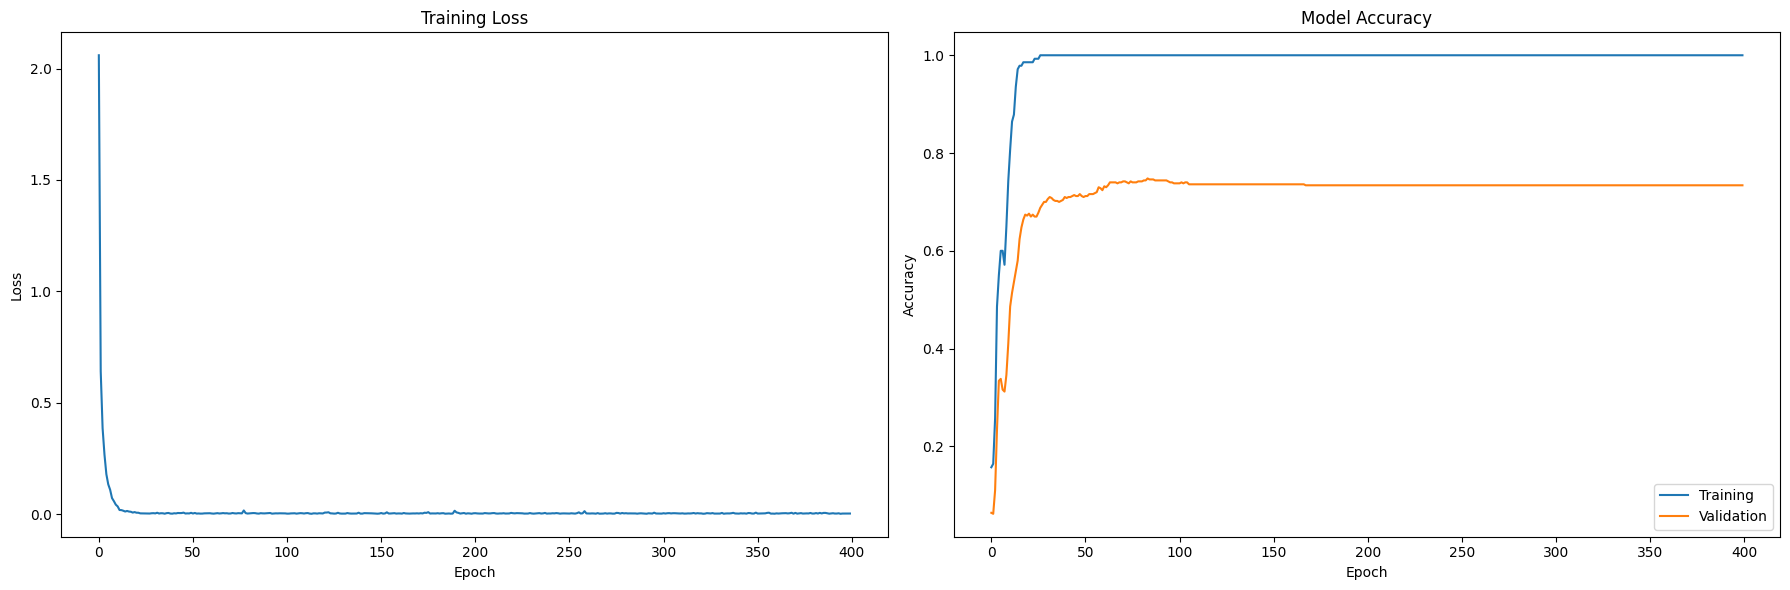

In [447]:
losses = []
train_accs = []
val_accs = []
epochs = 400

for epoch in range(epochs):
    loss = train()
    losses.append(loss.item())
    
    train_acc, _ = evaluate(data.train_mask)
    val_acc, _ = evaluate(data.val_mask)
    
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    scheduler.step(val_acc)
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch: {epoch+1:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Training')
plt.plot(val_accs, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig("training_curves.png", dpi=300, facecolor='white')

In [449]:
import sklearn
from sklearn.manifold import TSNE

def visualize_embeddings():
    model.eval()
    with torch.no_grad():
        embeddings = model.get_embeddings(data.x, data.edge_index).numpy()
        tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
        embeddings_2d = tsne.fit_transform(embeddings)
        
        plt.figure(figsize=(14, 10))
        for i in range(dataset.num_classes):
            mask = data.y.numpy() == i
            plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1], 
                        c=[class_colors[i]], label=class_names[i], 
                        alpha=0.8, s=60, edgecolors='white', linewidth=0.8)
        
        plt.title('Node Embedding Visualization')
        plt.legend(title='Paper Category')
        plt.tight_layout()
        plt.savefig("node_embeddings.png", dpi=300)



### t-SNE on trained model

t-SNE reduces complex datasets (with hundreds or thousands of features) into a 2D or 3D map. Its primary strength is preserving local structure, meaning points that are close to each other in high-dimensional space remain close in the visualization.

As can be seen from the plot, the embeddings for the nodes are separating the paper's subject quiet well.

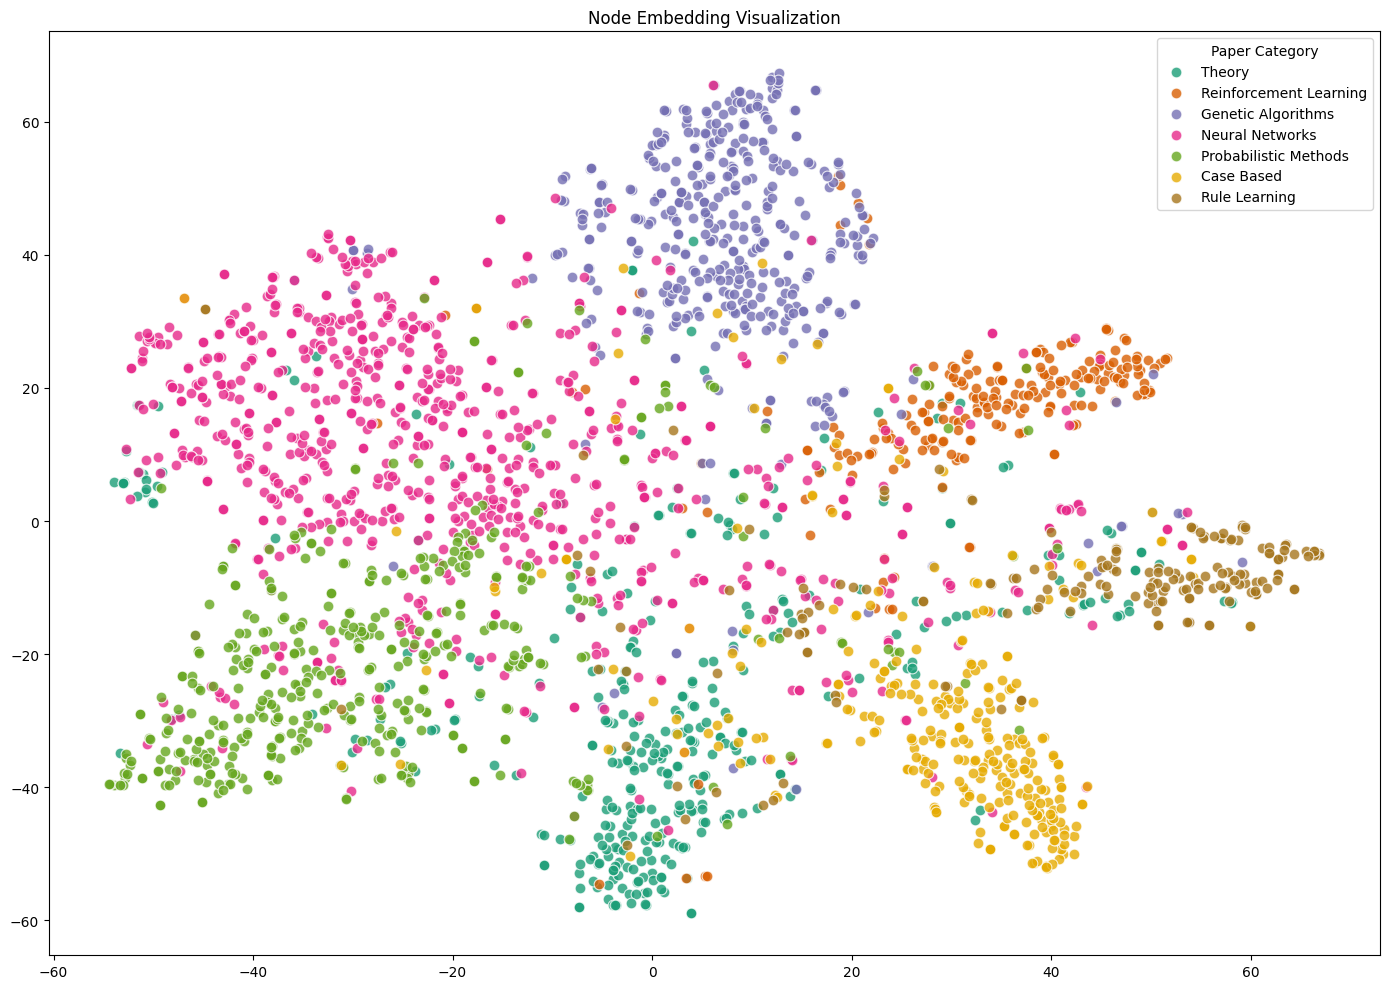

In [450]:
visualize_embeddings()

### t-SNE on untrained model

t-SNE reduces complex datasets (with hundreds or thousands of features) into a 2D or 3D map. Its primary strength is preserving local structure, meaning points that are close to each other in high-dimensional space remain close in the visualization.

As can be seen from the plot, the embeddings for the nodes are separating the paper's subject quiet well.

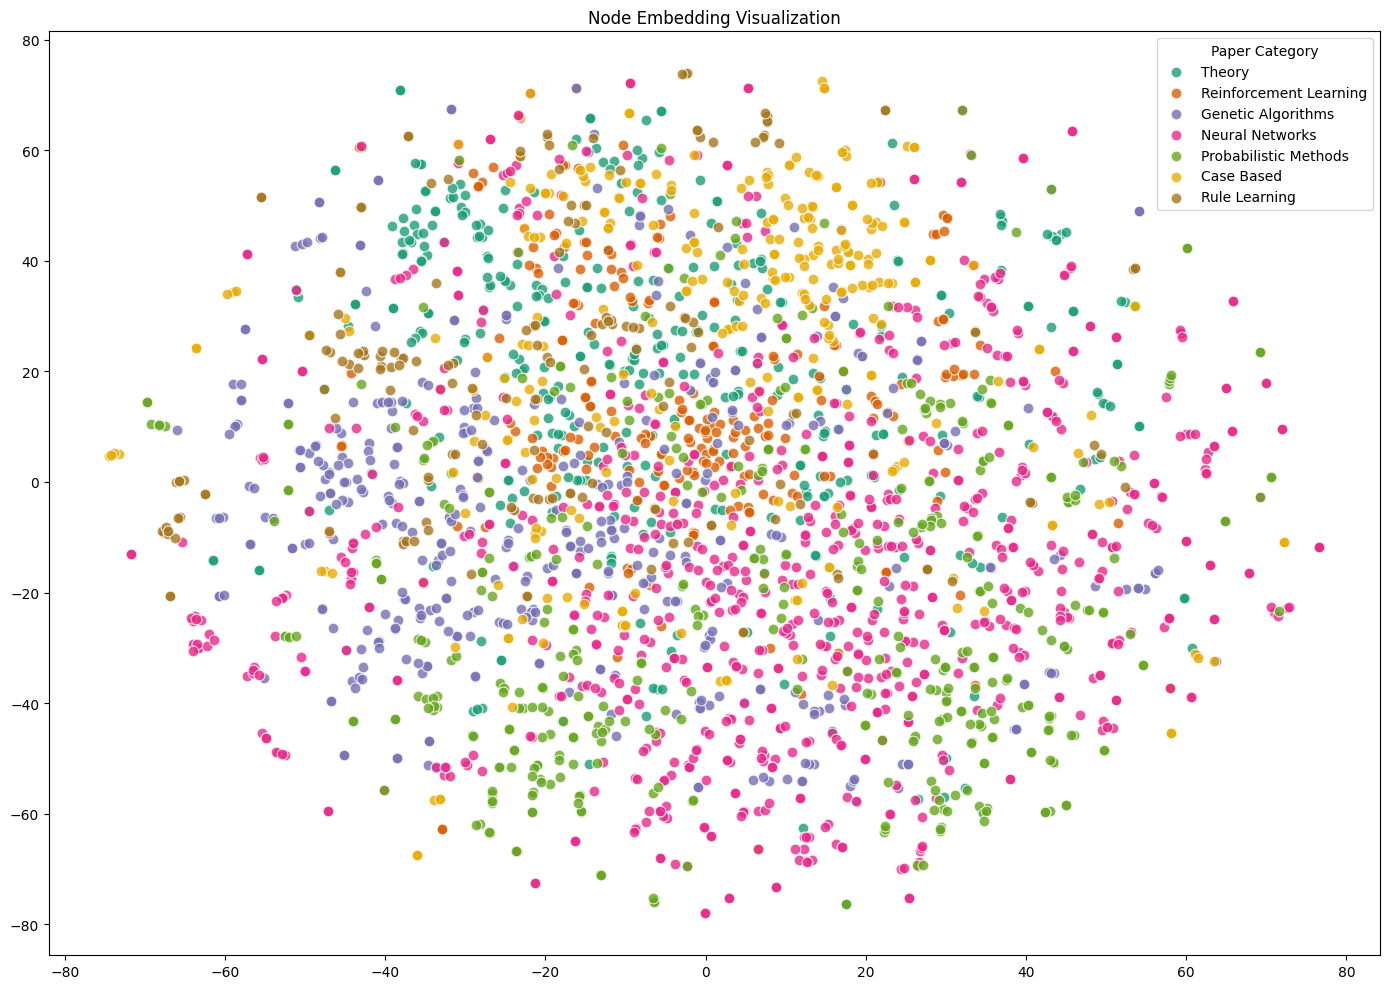

In [451]:
model = GCN(in_channels=dataset.num_features, 
            hidden_channels=32, 
            out_channels=dataset.num_classes,
            dropout=0.4) 
visualize_embeddings()

### Conclusions

As I am looking into Graph Neural Networks, https://medium.com/@f237811/visualizing-knowledge-networks-deep-dive-into-graph-convolutional-networks-with-the-cora-dataset-247901192347


In [ ]:
#https://medium.com/the-modern-scientist/graph-neural-networks-series-part-4-the-gnns-message-passing-over-smoothing-e77ffee523cc